# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

# Задания

1. Откройте файл с данными и изучите общую информацию
  1. Загрузите данные из csv-файла в датафрейм c помощью библиотеки pandas.
  2. Изучите общую информацию о полученном датафрейме.
  3. Постройте гистограмму для всех числовых столбцов таблицы на одном графике.
2. Предобработка данных
  1. Найдите и изучите пропущенные значения в столбцах:
    - Определите, в каких столбцах есть пропуски.
    - Заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски можно заменить на число 0. Если логичную замену предложить невозможно, то оставьте пропуски. Пропущенные значения — тоже важный сигнал, который нужно учитывать.
    - В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.
  2. Рассмотрите типы данных в каждом столбце:
    - Найдите столбцы, в которых нужно изменить тип данных.
    - Преобразуйте тип данных в выбранных столбцах.
    - В ячейке с типом markdown поясните, почему нужно изменить тип данных.
  3. Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты.
3. Добавьте в таблицу новые столбцы со следующими параметрами:
  - цена одного квадратного метра
  - день недели публикации объявления
  - месяц публикации объявления
  - год публикации объявления
  - тип этажа квартиры (значения — «первый», «последний», «другой»)
  - расстояние до центра города в километрах
4. Проведите исследовательский анализ данных:
  1. Изучите перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров. В некоторых параметрах встречаются редкие и выбивающиеся значения. Если природа аномалии понятна и данные действительно искажены, то восстановите корректное значение. В противном случае удалите редкие и выбивающиеся значения.

    Список параметров:

    - общая площадь;
    - жилая площадь;
    - площадь кухни;
    - цена объекта;
    - количество комнат;
    - высота потолков;
    - тип этажа квартиры («первый», «последний», «другой»);
    - общее количество этажей в доме;
    - расстояние до центра города в метрах;
    - расстояние до ближайшего парка
  2. Изучите, как быстро продавались квартиры
  3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?
  4. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.
  5. Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.
5. Напишите общий вывод


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Откройте файл с данными и изучите общую информацию.

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv')
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Первая проблема - в файле использован разделитель '\\t' вместо запятой. Прочитаем файл снова, указав корректный разделитель

In [3]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Файл прочитан, перейдём к изучению общих данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

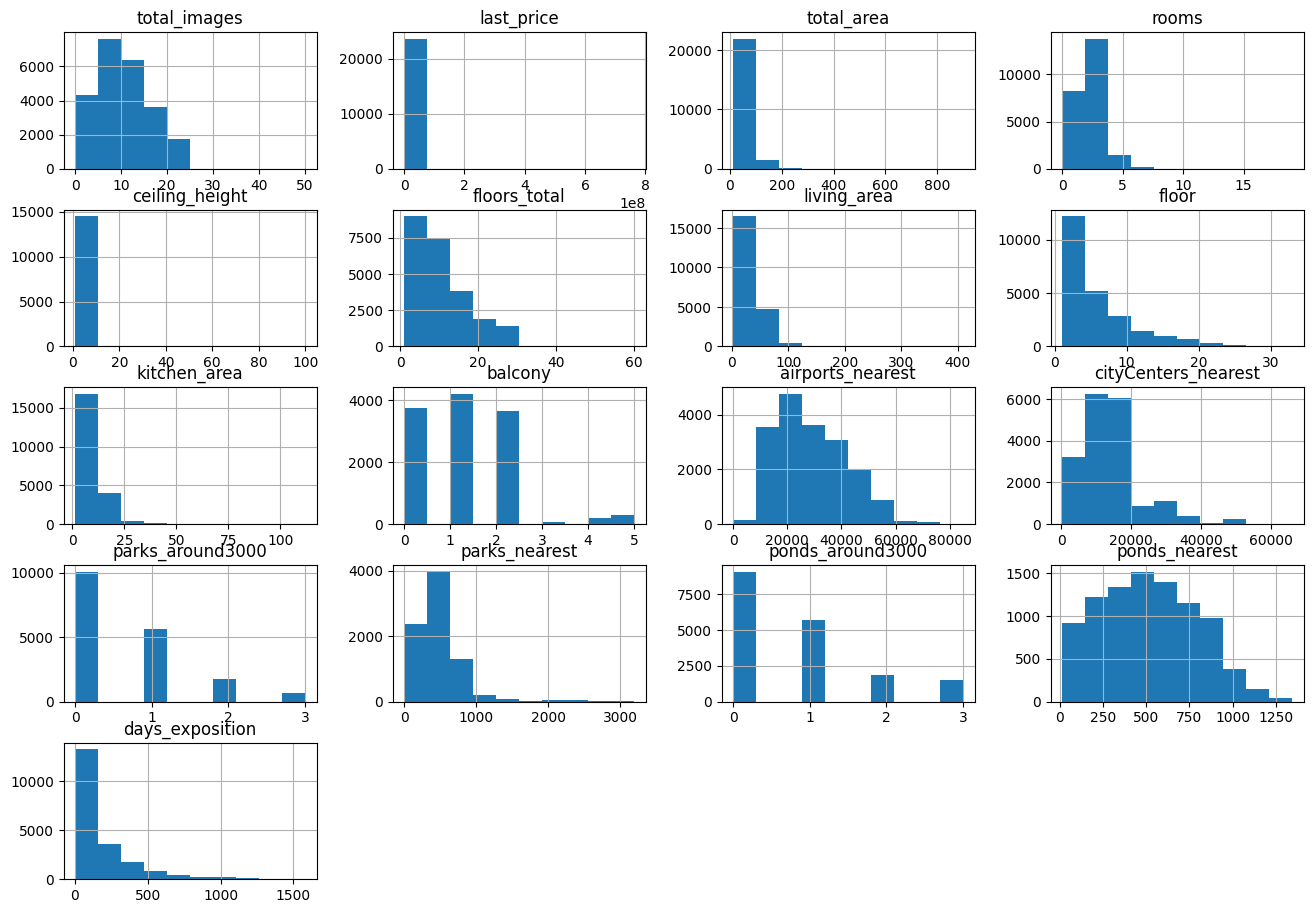

In [5]:
data.hist(figsize = (16, 11));

### Предобработка данных

#### Удаление пропусков

Видим большое количество пропусков, в разных столбцах. На этапе предобработки изучим их соотношение и попробуем от них избавиться, однако уже сейчас видно, что столбец `is_apartment` - лидер по пропущенным значениям. Однако, в таком виде данные сложно анализировать. Выведем доли количества пропусков по столбцам, отсортировав их по убыванию.

In [6]:
data.isna().mean().sort_values(ascending = False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
cityCenters_nearest     0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

Более половины столбцов имеют >5% пропусков.

Наибольшее число пропусков в столбце `is apartment`. Возможно, пользователи просто не указывали эти данные, если квартира не является апартаментами. В таком случае мы могли бы заполнить пропуски значениями `false`, однако, этот столбец не фигурирует в задании на исследование, поэтому на данный момент я не вижу смысла менять эти данные.

Следующие столбцы - `parks_nearest` и `ponds_nearest`. По смыслу они примерно одинаковы, поэтому будет логичным предположить, что природа пропусков у них общая. Рассмотрим пока `parks_nearest`, держа в уме наше предположение.

Наличие столбца с количеством парков, расположенных ближе 3000 метров наводит на мысли о том, что парки, нахоядщиеся дальше этого расстояния, не указывались, либо указывались редко. Проверим это предположение.

In [7]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<Axes: >

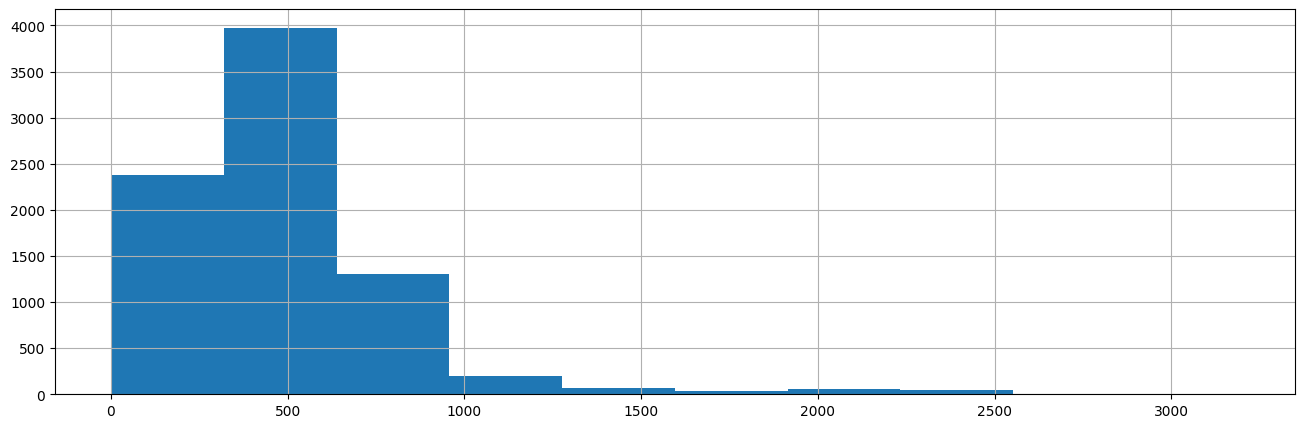

In [8]:
data['parks_nearest'].hist(figsize = (16, 5))

Действительно, видим что в данных почти не встречается записей  со значением более 3000. Посчитаем их количество

In [9]:
(data['parks_nearest'] > 3000).sum()

4

Если наше предположение верно, то записям с  'parks_nearest' = NaN будут соответствовать записи с parks_around3000 = 0 или NaN

In [10]:
def find_missing(first_column, second_column):
  print(f'Пропусков в {first_column}:', data[first_column].isna().sum())
  zero = ((data[first_column].isna()) & (data[second_column] == 0)).sum()
  nan = ((data[first_column].isna()) & (data[second_column].isna())).sum()
  print(f'Пропусков в {first_column}, и нулей в {second_column}, :, {zero}')
  print(f'Пропусков в {first_column} и пропусков в {second_column}, : {nan}')
  print(f'Суммарно по обоим фильтрам: {zero + nan}')

find_missing('parks_nearest', 'parks_around3000')
print()
find_missing('ponds_nearest', 'ponds_around3000')

Пропусков в parks_nearest: 15620
Пропусков в parks_nearest, и нулей в parks_around3000, :, 10102
Пропусков в parks_nearest и пропусков в parks_around3000, : 5518
Суммарно по обоим фильтрам: 15620

Пропусков в ponds_nearest: 14589
Пропусков в ponds_nearest, и нулей в ponds_around3000, :, 9071
Пропусков в ponds_nearest и пропусков в ponds_around3000, : 5518
Суммарно по обоим фильтрам: 14589


Наше предположение, как будто бы, подтверждается. Однако, не может настораживать одинаковое значение пропусков. Посмотрим на эти строки

In [11]:
data[(data['parks_nearest'].isna()) & (data['parks_around3000'].isna())].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000.0,40.00,2018-03-29T00:00:00,1,2.75,18.0,16.30,9,NaN,...,11.60,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
47,17,3600000.0,56.10,2018-10-18T00:00:00,3,NaN,4.0,42.50,3,NaN,...,5.70,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
60,3,2740000.0,35.00,2018-01-01T00:00:00,1,NaN,12.0,NaN,8,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
62,0,4800000.0,78.60,2017-09-17T00:00:00,3,2.80,9.0,48.80,5,NaN,...,11.90,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [12]:
data[(data['parks_nearest'].isna()) & (data['parks_around3000'].isna())].loc[:, 'airports_nearest':'ponds_nearest'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5518 entries, 5 to 23698
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   airports_nearest     0 non-null      float64
 1   cityCenters_nearest  0 non-null      float64
 2   parks_around3000     0 non-null      float64
 3   parks_nearest        0 non-null      float64
 4   ponds_around3000     0 non-null      float64
 5   ponds_nearest        0 non-null      float64
dtypes: float64(6)
memory usage: 301.8 KB


В этих строках полностью отсутствуют геоданные.

Немного изучив географию Ленинградской области при помощи Яндекс.Карт приходим к выводу, что в для этих строк наше предположение о том, что пропуски вызваны тем, что не указаны слишком большие расстояния, ошибочно. Так, например, буквально половина Гатчины - это парки, расстояния в 3км до ближайшего там не можеть быть никак.

Пометим эти данные, создав столбец `no_geodata`, чтобы, в последствии, не учитывать их при анализе соответствующих показателей. Проверим правильность кода, посчитав количество значение в новом столбце. Должно быть 5518.

In [13]:
data['no_geodata'] = (data['parks_nearest'].isna()) & (data['parks_around3000'].isna())
data['no_geodata'].sum()

5518

Взглянем на оставшиеся пропуски в геоданных

In [14]:
data[(data['no_geodata'] == False)].loc[:,'airports_nearest':'ponds_nearest'].isna().sum()

airports_nearest          24
cityCenters_nearest        1
parks_around3000           0
parks_nearest          10102
ponds_around3000           0
ponds_nearest           9071
dtype: int64

В `parks_nearest` и `ponds_nearest` знакомые нам числа - там остались только записи, для которых в столбцах `parks_around3000` и `ponds_around3000` стоят нули. При анализе геоданных эти значения будут отфильтрованы, поэтому заполнять их не имеет смысла.

Основная масса пропусков в геоданных отмечена. Перед тем, как возвратиться к остальной таблице, взглянем на оставшиеся пропуски.

In [15]:
data[(data['no_geodata'] == False) & (data['airports_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,no_geodata
733,18,18700000.0,109.7,2018-02-03T00:00:00,3,2.75,21.0,57.2,13,NaN,...,1.0,Санкт-Петербург,NaN,13355.0,1.0,735.0,0.0,NaN,112.0,False
974,8,25897000.0,149.0,2018-03-26T00:00:00,4,2.74,7.0,NaN,6,NaN,...,NaN,Санкт-Петербург,NaN,9734.0,2.0,469.0,3.0,263.0,90.0,False
2415,17,9500000.0,67.4,2017-04-15T00:00:00,2,2.80,23.0,37.6,4,NaN,...,0.0,Санкт-Петербург,NaN,13355.0,1.0,735.0,0.0,NaN,56.0,False
7521,16,43500000.0,245.8,2015-12-17T00:00:00,3,4.45,7.0,170.8,7,True,...,1.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1067.0,False
7542,10,6900000.0,50.0,2016-03-17T00:00:00,1,2.80,23.0,20.0,12,NaN,...,0.0,Санкт-Петербург,NaN,13355.0,1.0,735.0,0.0,NaN,317.0,False
8018,20,84000000.0,507.0,2015-12-17T00:00:00,5,4.45,7.0,301.5,7,True,...,1.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0,False
8628,0,8000000.0,48.9,2018-02-23T00:00:00,1,NaN,6.0,NaN,4,NaN,...,NaN,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,60.0,False
9054,5,13000000.0,71.8,2017-09-12T00:00:00,2,2.75,10.0,32.5,5,NaN,...,2.0,Санкт-Петербург,NaN,9734.0,2.0,469.0,3.0,263.0,156.0,False
9880,11,5300000.0,51.0,2018-01-10T00:00:00,2,NaN,5.0,22.6,4,NaN,...,NaN,Санкт-Петербург,NaN,4892.0,0.0,NaN,2.0,369.0,13.0,False
10669,9,3400000.0,46.0,2018-09-01T00:00:00,2,2.60,5.0,28.0,5,NaN,...,NaN,Санкт-Петербург,NaN,21377.0,0.0,NaN,0.0,NaN,106.0,False


Все записи непосредственно из Санкт-Петербурга. Заполним пропуски медианным значением расстояния до аэропорта для Санкт-Петербурга (методы Pandas при подсчёте средних и медианных значений не учитывают NaN, поэтому пропуски в строках с отсутствующими геоданными геоданными на нас не повлияют).

In [16]:
spb_airport_median = data[data['locality_name'] == 'Санкт-Петербург']['airports_nearest'].median()

data.loc[(data['no_geodata'] == False) & (data['airports_nearest'].isna()), 'airports_nearest'] = (
    data.loc[(data['no_geodata'] == False) & (data['airports_nearest'].isna()), 'airports_nearest'].fillna(spb_airport_median)
    )
data[(data['no_geodata'] == False)].loc[:,'airports_nearest':'ponds_nearest'].isna().sum()

airports_nearest           0
cityCenters_nearest        1
parks_around3000           0
parks_nearest          10102
ponds_around3000           0
ponds_nearest           9071
dtype: int64

Аналогичным образом поступим с единственным оставшимся пропуском в столбце `cityCenters_nearest `

In [17]:
data[(data['no_geodata'] == False) & (data['cityCenters_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,no_geodata
20190,2,10500000.0,85.0,2019-01-08T00:00:00,3,3.0,3.0,55.5,2,NaN,...,1.0,Пушкин,15527.0,NaN,1.0,134.0,0.0,NaN,NaN,False


In [18]:
pushkin_center_median = data[data['locality_name'] == 'Пушкин']['cityCenters_nearest'].median()

data.loc[(data['no_geodata'] == False) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = (
    data.loc[(data['no_geodata'] == False) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'].fillna(pushkin_center_median)
    )
data[(data['no_geodata'] == False)].loc[:,'airports_nearest':'ponds_nearest'].isna().sum()

airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest          10102
ponds_around3000           0
ponds_nearest           9071
dtype: int64

**Вывод: в более чем 5 тысячах записей геоданные отсутствую полностью. В случаях с парками и прудами пропуски в отдельных столбцах вызваны тем, что соответствующие объекты в радиусе 3 км. отсутствуют.**

Пропуски в геоданных устранены (или помечены). Вернёмся к пользовательским данным

Заполним пропуски в `kitchen_area` и `living_area` медианными значениями для квартир с тем же числом комнат. Однако, для начала взглянем на сам столбец `rooms`

In [19]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

В наших данных нашлось почти 200 0-комнатных квартир. Скорее всего это квартиры-студии, попробуем это проверить

In [20]:
data[data['studio'] == True]['rooms'].value_counts()

0    138
1     11
Name: rooms, dtype: int64

С квартирами-студиями у пользователей определённо небольшая путаница. Кто-то считает их однокомнатными, кто-то - нет. Будем считать, что все 0-комнатные квартиры - студии. Косвенно это можно проверить по площади - она не должна быть слишком большой

<Axes: >

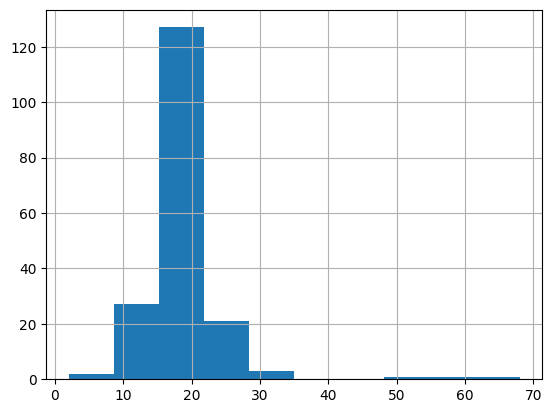

In [21]:
data[data['rooms'] == 0]['living_area'].hist()

Да, большинство квартир действительно в пределах от 10 до 30 м². Студии [большего](https://realty.ya.ru/offer/4146757988524648819/) и [меньшего](https://realty.ya.ru/offer/4375662070673178369/) размеров также иногда встречаются на Яндекс.Недвижимости.

Заполним пропуски в столбцах `living_area` и `kitchen_area` медианными значениями для квартир с таким же числом комнат (для 0-комнатных будем использовать данные о студиях, а площадь кухонь заполним нулями)

In [22]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [23]:
def fill_median_by_rooms (column):
  for rooms in data['rooms'].unique():
    if rooms > 0:
      median = data[data['rooms'] == rooms][column].median()
      data.loc[data['rooms'] == rooms, column] = data.loc[data['rooms'] == rooms, column].fillna(median)

fill_median_by_rooms('kitchen_area')
fill_median_by_rooms('living_area')

data.loc[data['rooms'] == 0, 'living_area'] = data.loc[data['rooms'] == 0, 'living_area'].fillna(data[data['studio'] == True]['living_area'].median())
data.loc[data['rooms'] == 0, 'kitchen_area'] = data.loc[data['rooms'] == 0, 'kitchen_area'].fillna(0)

Воспольуемся идеей из описания проекта - предположим, что пропуски стоят у квартир без балконов

In [24]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Действительно, в данных 0 балконов не встречается. Заполним пропуски нулями и выполним проверку

In [25]:
data['balcony'].fillna(0, inplace = True)
data['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Заполнять пропуски в столбце `days_exposition` чем бы то ни было, на мой взгляд, не очень корректно, поскольку мы не знаем факторов, которые не влияют на эту переменную (что само по себе заслуживает отдельного исследования).

Посмотрим на пропуски во `floors_total`

In [26]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,no_geodata
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,0.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0,False
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0,False
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0,False
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0,False
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,17.60,9,NaN,...,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,30.50,3,NaN,...,0.0,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0,False
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,NaN,...,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0,False
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,NaN,...,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0,False
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,NaN,...,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0,False


Первоначальная теория о том, что все такие квартиры расположены в одноэтажных домах не подтвердились. Как и в случае с `days_exposition` мы не можем предположить причину пропусков и не можем их заполнить.

В столбце `locality_name` пропуски можно заполнить только пустой строкой

In [27]:
data['locality_name'] = data['locality_name'].fillna('')
data['locality_name'].isna().sum()

0

**В пользовательских данных присутствуют два типа пропусков - случайные (как, например, количество этажей в доме) и неслучайнве (например, количество балконов или комнаты). Случайные пропуски были оставлены без изменений, неслучайные заполнены медианными значениями**

Посмотрим, нет ли необходимости в преобразовании типов данных

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Единственное *необходимое* преобразование - это привести `first_day_exposition` к datetime. Замена типа данных в `is_apartment` невозможна, т.к. для типа bool метод `astype()` будет возвращать `True` на значениях `NaN`. Замена float на int никак не скажется на анализе (однако, не лишним будет проверить что туда не закрались дробные значения)

In [29]:
data['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [30]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Проверим, что наши целочисленные значения действительно целочисленные, выполнив взятие остатка от деления на 1. Для целочисленных значений результат будет равен 0. Просуммируем результаты.

In [31]:
columns = ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']
print('Нецелочисленные значения по столбцам')
for col in columns:
  print(col, data[(data[col] % 1 != 0) & ~(data[col].isna())][col].count(),
        (data[(data[col] % 1 != 0) & ~(data[col].isna())][col] % 1).sum())

Нецелочисленные значения по столбцам
floors_total 0 0.0
balcony 0 0.0
parks_around3000 0 0.0
ponds_around3000 0 0.0
days_exposition 3997 9.530243261224314e-11


Округлим значения в `days_exposition`

In [32]:
print('Сумма до округления', data['days_exposition'].sum())
data['days_exposition'] = data['days_exposition'].round(0)
col = 'days_exposition'
print(col, data[(data[col] % 1 != 0) & ~(data[col].isna())][col].count(), (data[(data[col] % 1 != 0) & ~(data[col].isna())][col] % 1).sum())
print('Сумма после округления', data['days_exposition'].sum())

Сумма до округления 3711473.0
days_exposition 0 0.0
Сумма после округления 3711473.0


**Выполнено преобразование данных в столбце `first_day_exposition` к datetime. Необходимости в преобразовании `float` к целочисленным типам не выявлено.**

In [33]:
data['balcony'] = data['balcony'].astype('int')

#### Устранение дубликатов

Устраним дубликаты в `locality_name`

In [34]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [35]:
len(data['locality_name'].unique())

365

Первое, что следует сделать при работе с любым текстом - унифицировать регистр. Первое, что следует сделать при работе с любым кириллическим текстом - заменить ё на е

In [36]:
data['locality_name'] = data['locality_name'].str.lower().str.replace('ё', 'е')
len(data['locality_name'].unique())

331

В целом, нас не интересуют статусы населённых пунктов. Просто отрежем всё, кроме названий. Надо помнить о том, что "отрезать" надо от большего к меньшему, потому что если мы сначала удалим подстроку "посёлок", то подстрока "коттеджный посёлок" найдена не будет

In [37]:
town_types = ['поселок городского типа', 'городской поселок', 'поселок при железнодорожной станции', 'садоводческое некоммерческое товарищество', 'садовое товарищество', 'поселок станции',
              'коттеджный поселок', 'поселок', 'село', 'деревня']
for t_type in town_types:
  data['locality_name'] = data['locality_name'].str.replace(t_type + ' ', '')
len(data['locality_name'].unique())

306

**Устранены дубликаты в названиях населённых пунктов. Названия приведены к одному регистру, удалена буква ё**

#### Изучение данных на предмет выбросов

Перед очисткой сохраним размеры таблицы

In [38]:
shape_init = data.shape

Для получения общего предстваления о наличии / отсуствии выбросов построим гистограммы

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'first_day_exposition'}>],
       [<Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>],
       [<Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>],
       [<Axes: title={'center': 'cityCenters_nearest'}>,
        <Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>],
       [<Axes: title={'center': 'ponds_nearest'}>,
        <Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >]],
      dtype=object)

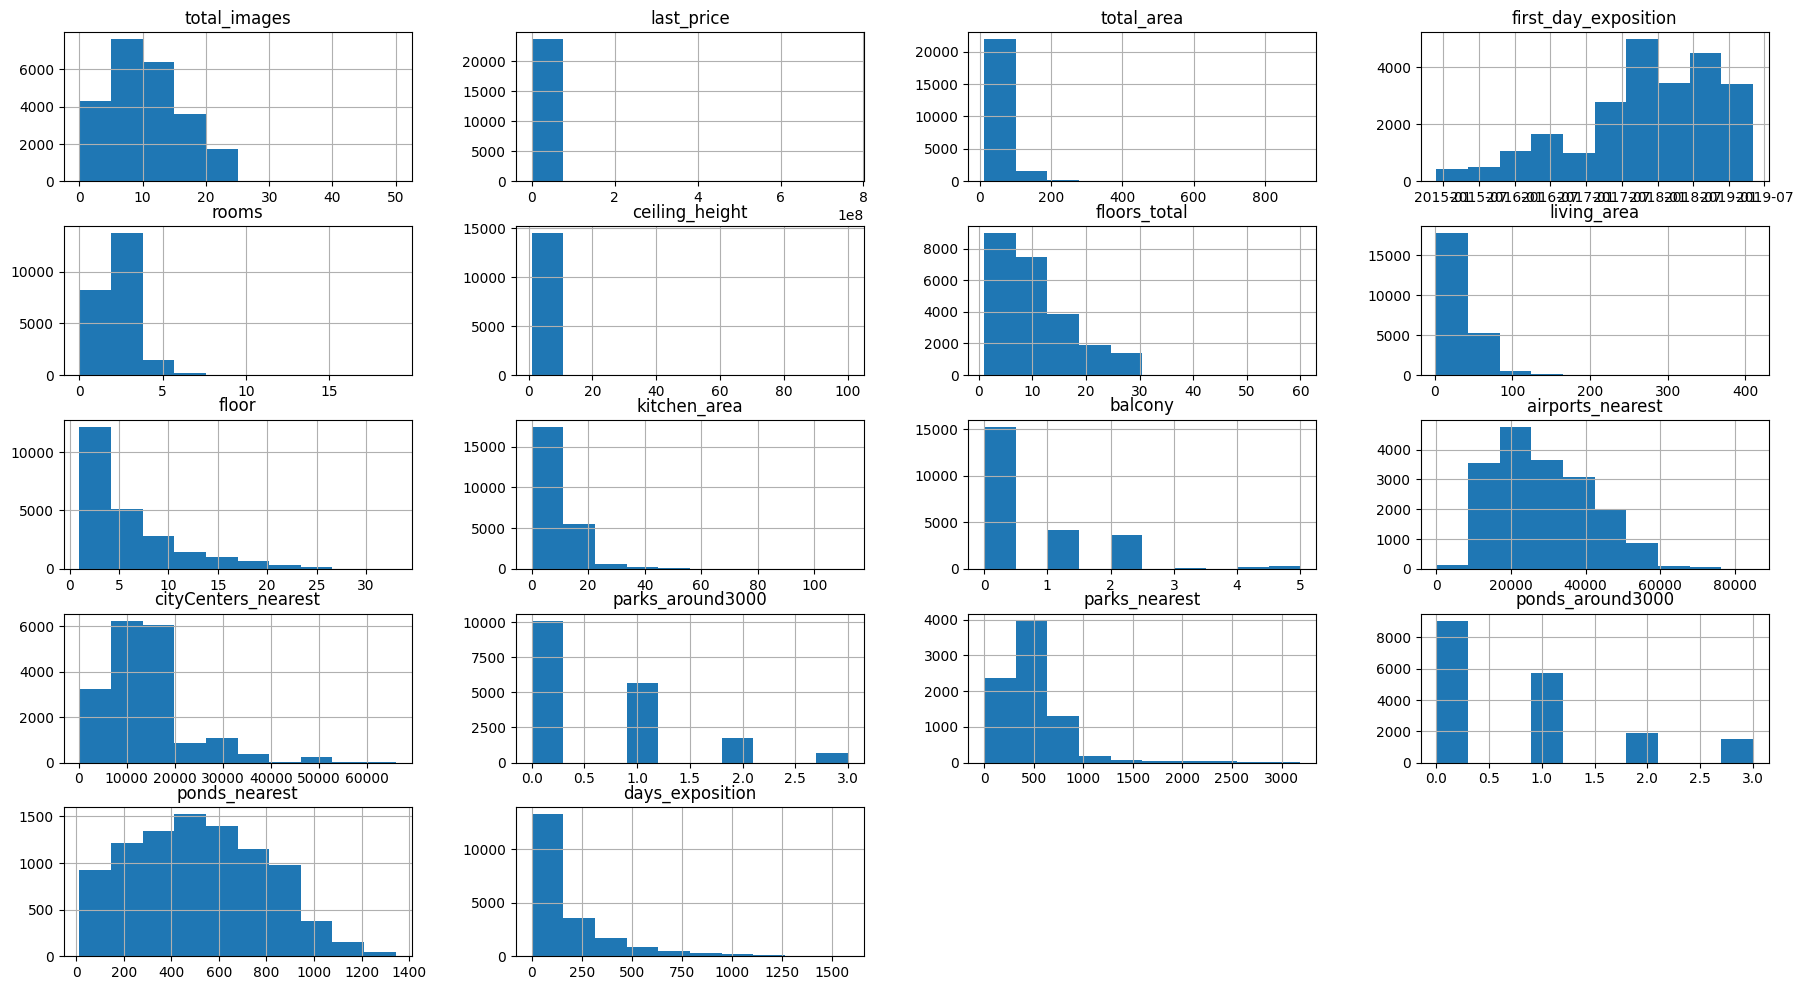

In [39]:
data.hist(figsize = (22, 12))

В ряде гистограмм наблюдается схожая картина - пустая область справа. Это может быть признаками выбросов. Рассмотрим такие столбцы подробнее

<Axes: >

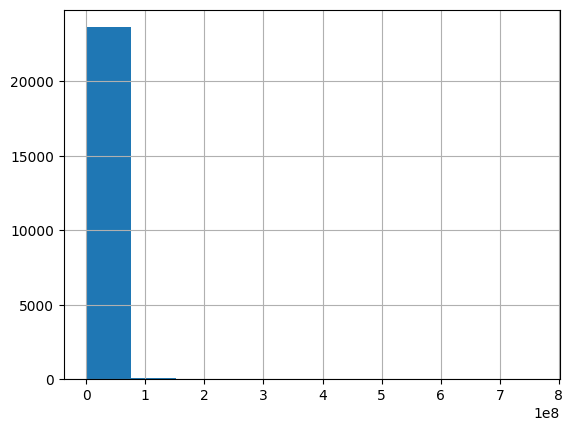

In [40]:
data['last_price'].hist()

In [41]:
(data['last_price'] / (1 * (10 ** 6))).describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

Минимум в нашей выборке - 12 тысяч рублей. Довольно неправдоподобная цена. Посмортим, сколько всего квартир с аномально низкими ценами

In [42]:
data[data['last_price'] < 1 * (10 ** 6)]['last_price'].sort_values()

8793      12190.0
14911    430000.0
17456    430000.0
16274    440000.0
9581     450000.0
           ...   
1781     990000.0
14341    990000.0
13420    995000.0
1761     999000.0
16862    999999.0
Name: last_price, Length: 225, dtype: float64

В выборке всего одна запись с настолько низкой ценой. Удалим её.

In [43]:
data = data.drop(8793)

Встречаются квартиры с ценой > 50 млн. рублей, причём таких квартир довольно мало. Посчитаем их количество

In [44]:
drop_criteria = 50 * 10 ** 6
data[data['last_price'] > drop_criteria]['last_price'].count()

131

Действительно, их количество невелико. Удалим эти данные.

In [45]:
to_delete = data[data['last_price'] > drop_criteria].index
to_delete
data = data.drop(to_delete)
data.shape[0] / shape_init[0]

0.9944301447318452

<Axes: >

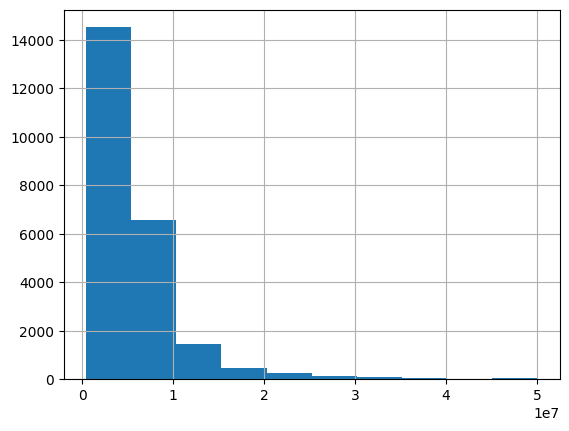

In [46]:
data['last_price'].hist()

Рассмотрим данные об количестве комнат

In [47]:
data['rooms'].value_counts()

1     8047
2     7934
3     5781
4     1148
5      298
0      196
6       90
7       48
8        9
9        7
10       3
11       2
14       2
19       1
16       1
Name: rooms, dtype: int64

По каждой категории квартир от 6 комнат и выше есть менее ста записей. Удалим эти данные, как нерепрезентативные

In [48]:
drop_criteria = 5
data[data['rooms'] > drop_criteria]['rooms'].count()

163

In [49]:
to_delete = data[data['rooms'] > drop_criteria].index
to_delete
data = data.drop(to_delete)
data.shape[0] / shape_init[0]

0.9875522173931389

In [50]:
data['rooms'].value_counts()

1    8047
2    7934
3    5781
4    1148
5     298
0     196
Name: rooms, dtype: int64

Перейдём к рассмотрению данных об общей площади

<Axes: >

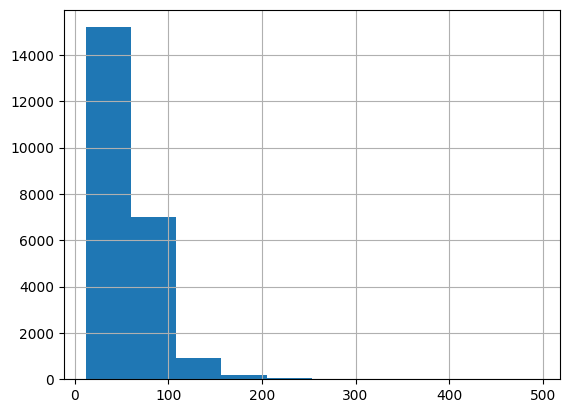

In [51]:
data['total_area'].hist()

Квартиры с площадью > 200 м² в нашей выборке встречаются редко. Подсчитаем их.

In [52]:
drop_criteria = 200
data[data['total_area'] > drop_criteria]['total_area'].count()

68

Таких данных очень мало, можем удалить их

In [53]:
to_delete = data[data['total_area'] > drop_criteria].index
to_delete
data = data.drop(to_delete)
data.shape[0] / shape_init[0]

0.9846828980125744

<Axes: >

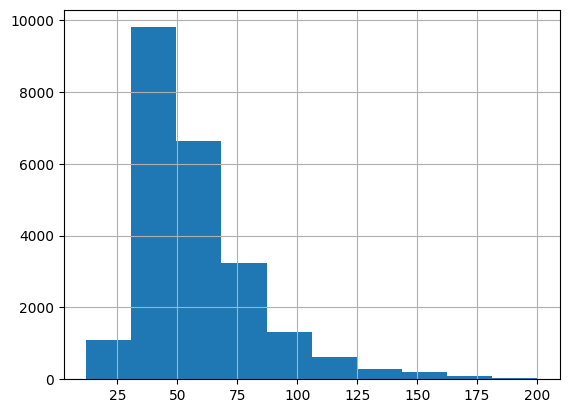

In [54]:
data['total_area'].hist()

Следующий подозрительный столбец - `ceiling_height`

In [55]:
data['ceiling_height'].describe()

count    14262.000000
mean         2.761841
std          1.267775
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Потолки высотой 1 и 100 метров выглядят одинаково невероятными.

<Axes: >

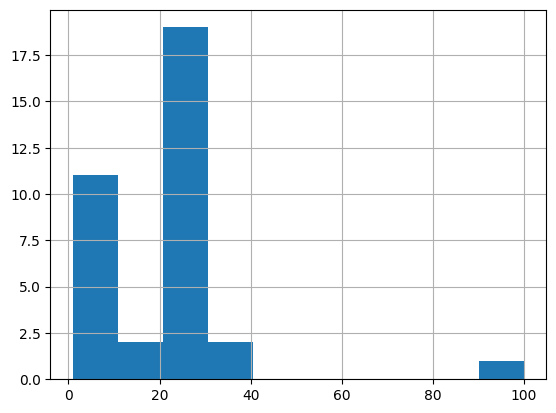

In [56]:
data[(data['ceiling_height'] < 2) | (data['ceiling_height'] > 5)]['ceiling_height'].hist()

Можно предположить, что значения выше 11 - это, на самом деле, в 10 раз меньшие числа

In [57]:
data.loc[(data['ceiling_height'] > 11), 'ceiling_height'] = (
    data.loc[(data['ceiling_height'] > 11) & (data['ceiling_height'] < 50), 'ceiling_height'] / 10)
data['ceiling_height'].describe()

count    14261.000000
mean         2.717844
std          0.284038
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max         10.300000
Name: ceiling_height, dtype: float64

Проверим данные о квартирах с потолками менее двух метров

In [58]:
data[data['ceiling_height'] < 2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,no_geodata
5712,5,1500000.0,42.8,2017-08-14,2,1.20,2.0,27.5,1,NaN,...,0,мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0,True
15061,19,5600000.0,56.4,2018-05-11,2,1.40,14.0,32.4,5,NaN,...,2,санкт-петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0,False
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37.0,17.4,5,NaN,...,0,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0,False
22590,16,6000000.0,55.0,2018-10-31,2,1.00,12.0,32.4,7,NaN,...,0,санкт-петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0,False


Таких значений всего 4. Их можно безболезненно удалить

In [59]:
data = data.drop(index = (data[data['ceiling_height'] < 2]).index)
data['ceiling_height'].describe()
data.shape

(23332, 23)

Рассмотрим данные в столбце `floors_total`

In [60]:
data['floors_total'].describe()

count    23248.000000
mean        10.735891
std          6.610853
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Самый высокий жилой дом в Санкт Петербурге имеет 37 этажей. Всё что выше - явные ошибки.

In [61]:
data[data['floors_total'] > 37]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,no_geodata
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,NaN,...,0,кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0,False
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52.0,10.5,18,NaN,...,0,санкт-петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0,False


In [62]:
data = data.drop(index = (data[data['floors_total'] > 37]).index)
data.shape

(23330, 23)

Рассмотрим данные в столбце `cityCenters_nearest`

In [63]:
(data['cityCenters_nearest'] / 1000).describe()

count    17821.000000
mean        14.345567
std          8.578777
min          0.181000
25%          9.542000
50%         13.205000
75%         16.379000
max         65.968000
Name: cityCenters_nearest, dtype: float64

Сделаем группировку по городам, чтобы оценить достоверность значений

In [64]:
t = data[~data['no_geodata']].groupby('locality_name')['cityCenters_nearest'].agg(['max', 'median'])
t['difference'] = t['max'] - t['median']
t.sort_values(by = 'difference', ascending = False)

,max,median,difference
locality_name,,,
,41294.0,8943.0,32351.0
санкт-петербург,29493.0,12342.0,17151.0
петергоф,49574.0,33771.0,15803.0
красное село,41792.0,29140.5,12651.5
ломоносов,61495.0,51677.0,9818.0
зеленогорск,62706.0,53381.0,9325.0
сестрорецк,42971.0,34834.0,8137.0
шушары,32079.0,24212.0,7867.0
пушкин,35610.0,27920.0,7690.0


Как показала проверка по яндекс.картам, расстояние, указанное в `cityCenters_nearest` - это расстояние до цетра Санкт-Петербурга по дорогам. По большей части данные выглядят довольно правдоподобно, даже данные по самому Санкт-Петербургу (ст. м. Парнас находится примерно в 25 км. от центра города).

Проверим, какой процент данных мы удалили

<a id="deleted_count"></a>

In [65]:
1 - (data.shape[0] / shape_init[0])

0.015570277226887197

Всего было удалено окого 1.5% данных

### Посчитайте и добавьте в таблицу новые столбцы

Расчёт цены квадратного метра

In [66]:
data['sq_meter_price'] = data['last_price'] / data['total_area']
(data['sq_meter_price'] / 1000).describe()

count    23330.000000
mean        97.525140
std         39.603649
min          7.962963
25%         76.388889
50%         94.777668
75%        113.732806
max        848.484848
Name: sq_meter_price, dtype: float64

Добавление дня недели, месяца и года добавления объявления

In [67]:
data['weekday_exposition'] = data['first_day_exposition'].dt.dayofweek
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,no_geodata,sq_meter_price,weekday_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,1.0,482.0,2.0,755.0,NaN,False,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,0.0,NaN,0.0,NaN,81.0,False,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,1.0,90.0,2.0,574.0,558.0,False,92785.714286,3,8,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,2.0,112.0,1.0,48.0,121.0,False,100000.000000,1,6,2018
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,...,NaN,NaN,NaN,NaN,55.0,True,95065.789474,0,9,2018


Добавление типа этажа

In [68]:
def floor_category (row):
  category = 'другой'
  if row['floor'] == 1:
    category = 'первый'
  elif row['floor'] == row['floors_total']:
    category = 'последний'
  return category

data['floor_type'] = data.apply(floor_category, axis = 1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,no_geodata,sq_meter_price,weekday_exposition,month_exposition,year_exposition,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,482.0,2.0,755.0,NaN,False,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,NaN,0.0,NaN,81.0,False,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,90.0,2.0,574.0,558.0,False,92785.714286,3,8,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,112.0,1.0,48.0,121.0,False,100000.000000,1,6,2018,другой
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,...,NaN,NaN,NaN,55.0,True,95065.789474,0,9,2018,другой


Расчёт расстояния до центра города в километрах

In [69]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(0)
data['cityCenters_nearest_km'].head()

0    16.0
1    19.0
2    14.0
4     8.0
5     NaN
Name: cityCenters_nearest_km, dtype: float64

### Проведите исследовательский анализ данных

#### Изучение параметров объектов

Общая площадь

In [70]:
data['total_area'].describe()

count    23330.000000
mean        57.614847
std         25.455660
min         12.000000
25%         40.000000
50%         51.400000
75%         68.100000
max        200.000000
Name: total_area, dtype: float64

<Axes: >

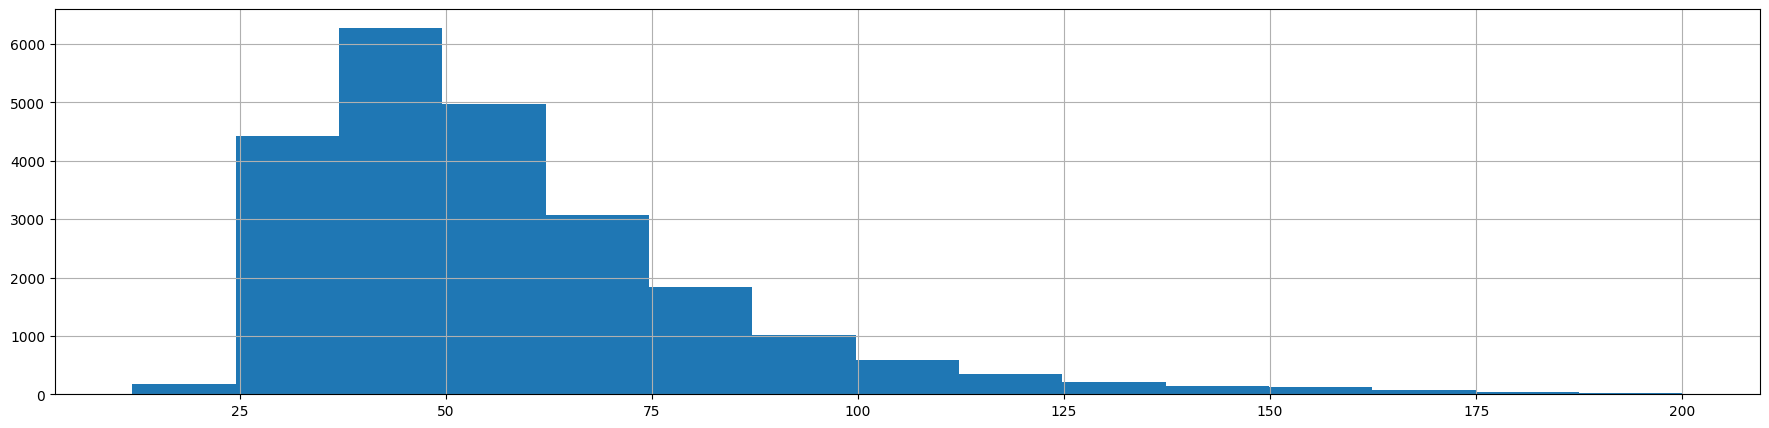

In [71]:
data['total_area'].hist(bins = 15, figsize = (22, 5))

**Наиболее часто встречаются квартиры, площадью около 50 м², после чего частота начинает нелинейно убывать**

Жилая площадь

In [72]:
data['living_area'].describe()

count    23330.000000
mean        32.778884
std         16.424458
min          2.000000
25%         18.300000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

<Axes: >

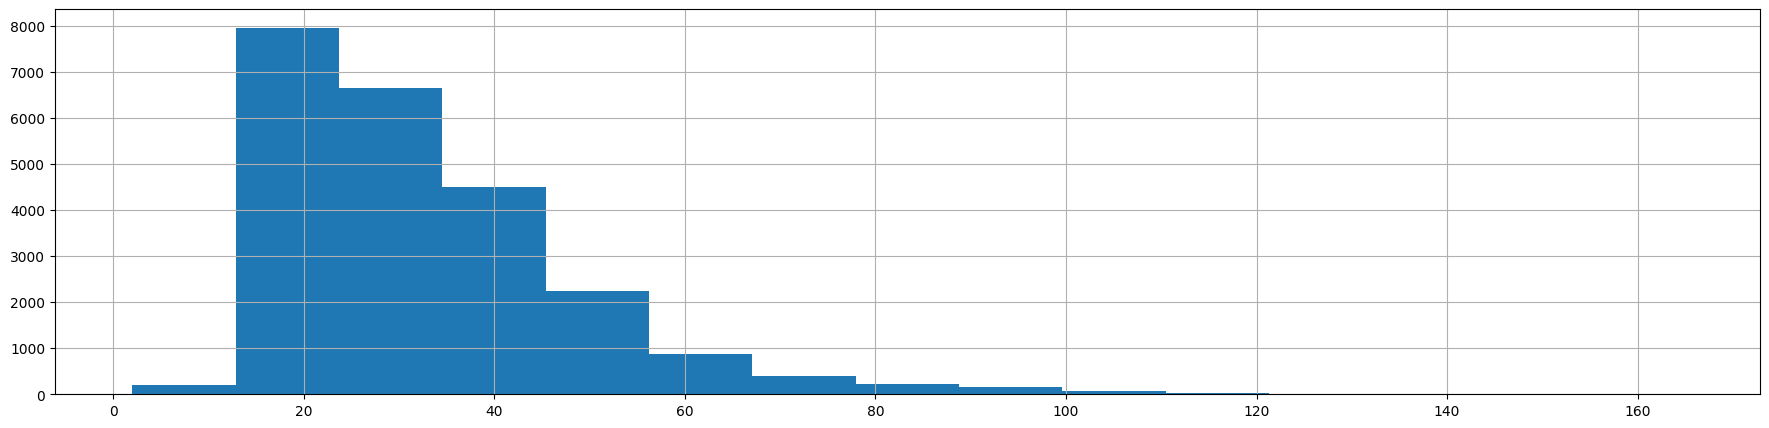

In [73]:
data['living_area'].hist(bins = 15, figsize = (22, 5))

**Наиболее часто встречаются квартиры, в которых жилая площадь занимает 20 м², после чего частота начинает нелинейно убывать, аналогично полной площади**

Площадь кухни

In [74]:
data['kitchen_area'].describe()

count    23330.000000
mean        10.144260
std          5.038344
min          0.000000
25%          7.100000
50%          9.040000
75%         11.300000
max         75.000000
Name: kitchen_area, dtype: float64

<Axes: >

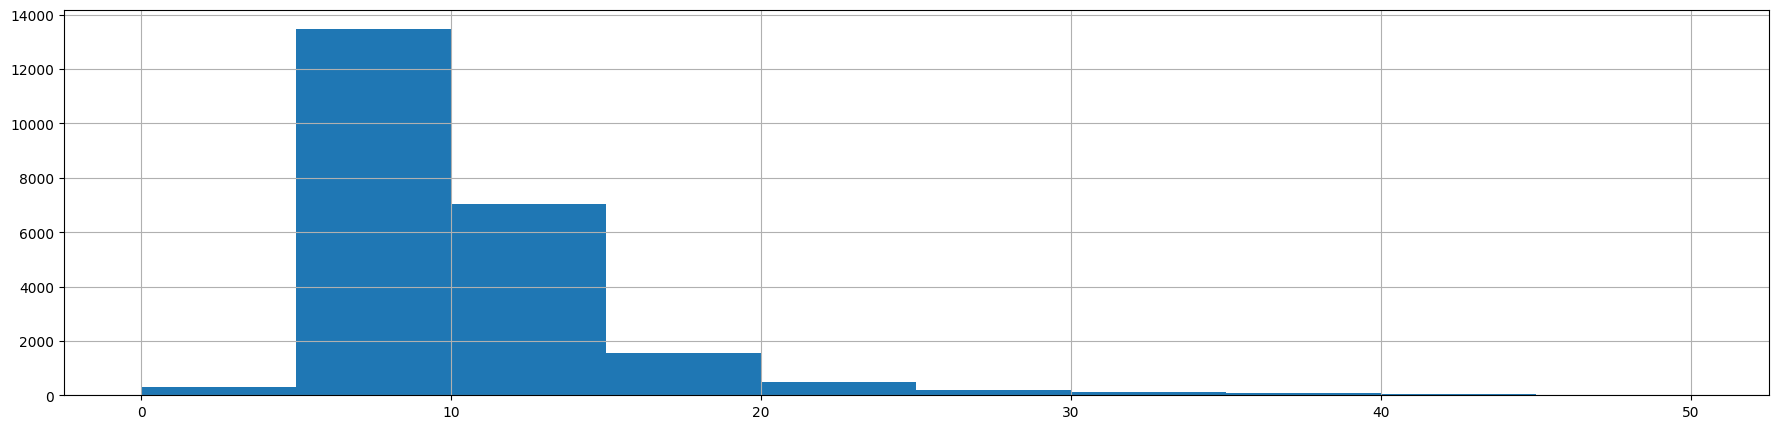

In [75]:
data['kitchen_area'].hist(bins = 10, range = (0, 50), figsize = (22, 5))

**Распределение площади кухонь, по форме, сходно с распределением общей и жилой площади и имеет пик в районе 10**

Цена объекта

Будем рассматривать цену в миллионах рублей

In [76]:
(data['last_price'] / (1 * 10 ** 6)).describe()

count    23330.000000
mean         5.827781
std          4.578663
min          0.430000
25%          3.400000
50%          4.600000
75%          6.600000
max         50.000000
Name: last_price, dtype: float64

<Axes: >

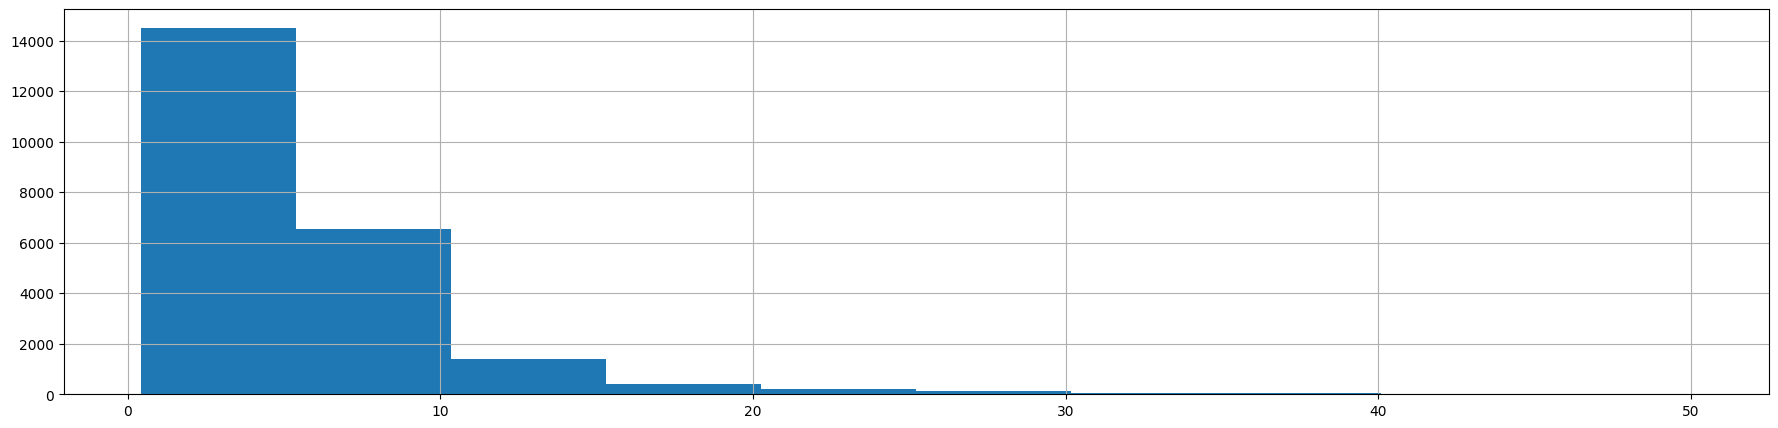

In [77]:
(data['last_price'] / (1 * 10 ** 6)).hist(bins = 10, figsize = (22, 5))

**Больше всего встречается квартир, стоимостью менее 5 миллионов. Частота появления квартир нелинейно убывает. В целом, встречается крайне малое количество квартир, стоимостью выше 10 млн.**

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Разделить все значения на 1 млн - хорошее решение
</div>

In [78]:
data['rooms'].describe()

count    23330.000000
mean         2.015988
std          0.958951
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

<Axes: >

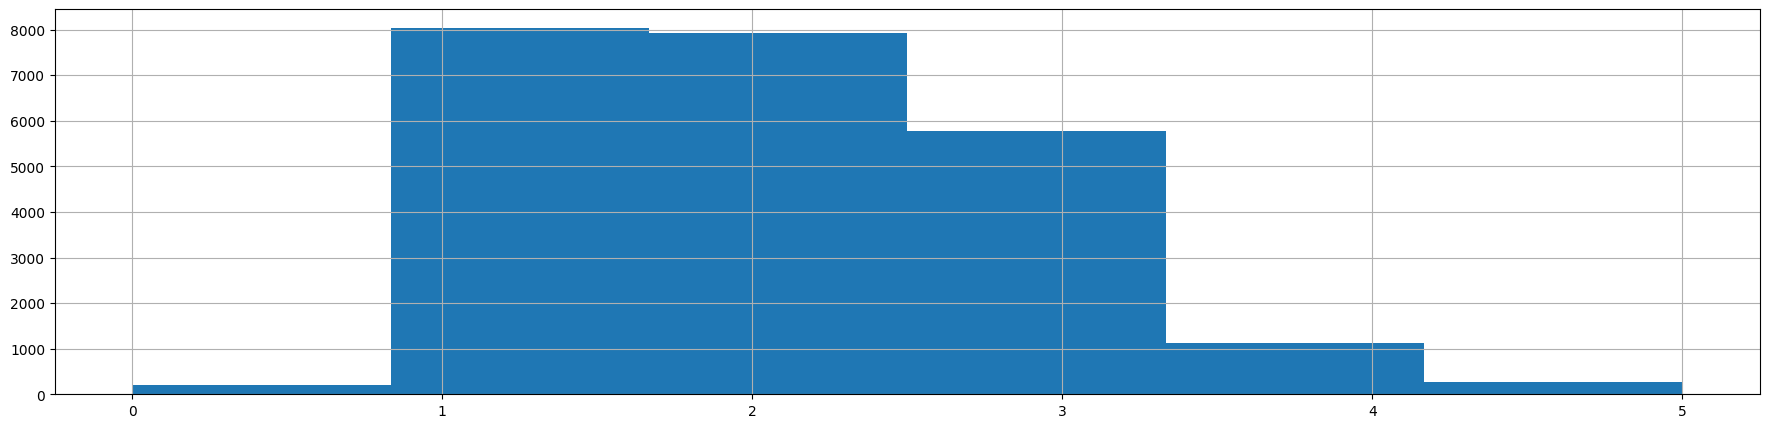

In [79]:
data['rooms'].hist(bins = 6, figsize = (22, 5))

**Самые часто встречающиеся квартиры - одно- и двухкомнатные. Наиболее редкие - студии и пятикомнатные**

In [80]:
data['ceiling_height'].describe()

count    14255.000000
mean         2.718225
std          0.283113
min          2.000000
25%          2.500000
50%          2.650000
75%          2.800000
max         10.300000
Name: ceiling_height, dtype: float64

<Axes: >

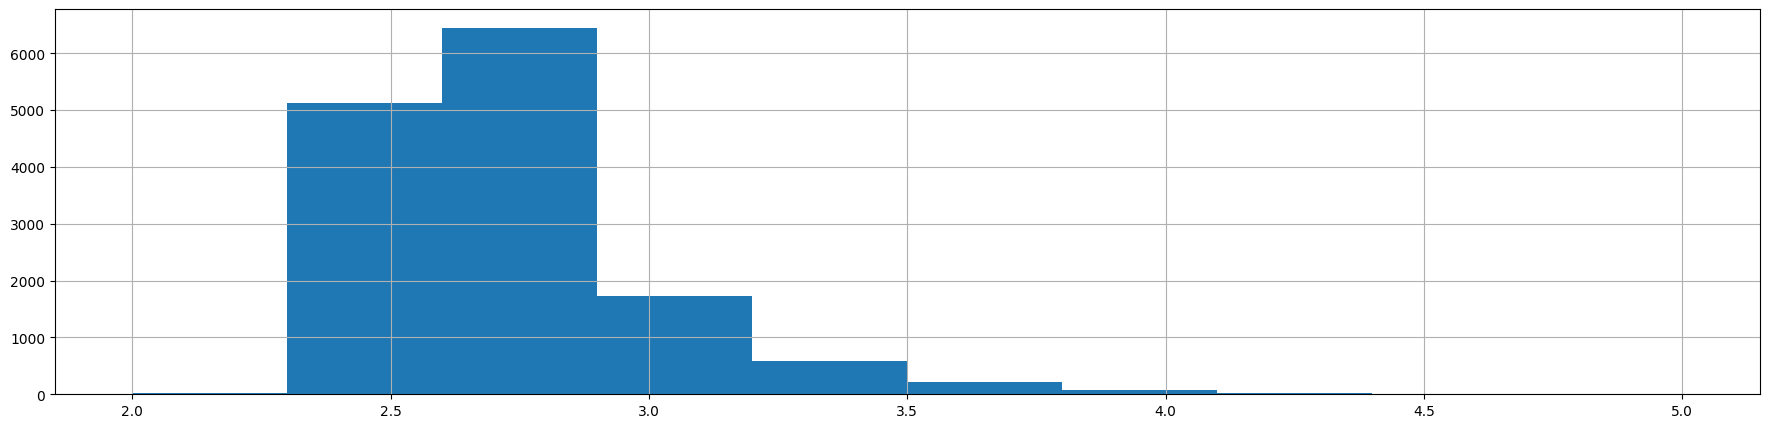

In [81]:
data['ceiling_height'].hist(bins = 10, range = (2, 5), figsize = (22, 5))

**Потолки 3 метра и выше встречаются довольно редко. Ещё реже встречаются двухметровые.**

In [82]:
data['floor'].describe()

count    23330.000000
mean         5.909559
std          4.899037
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<Axes: >

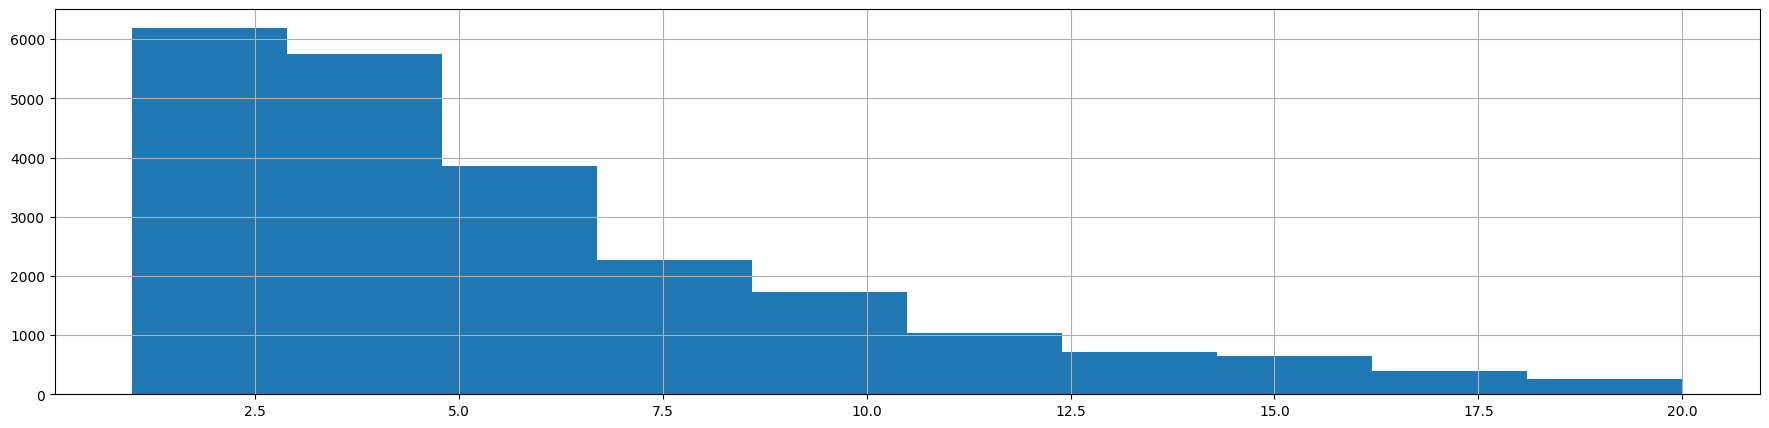

In [83]:
data['floor'].hist(bins = 10, range = (1, 20), figsize = (22, 5))

**Чаще всего встречаются квартиры, расположенные ниже пятого этажа. Количество квартир нелинейно убывает с ростом этажности**

In [84]:
data['floor_type'].value_counts(normalize = True)

другой       0.737462
последний    0.138748
первый       0.123789
Name: floor_type, dtype: float64

<Axes: xlabel='floor_type'>

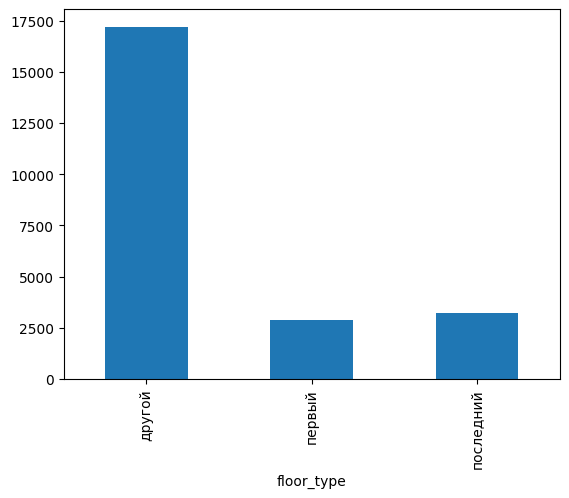

In [85]:
data.groupby('floor_type')['floor_type'].count().plot(kind = 'bar')

**Доля первых и последних этажей примерно одинакова, доля средних этажей значительно выше. Такое распределние косвенно подтверждает репрезентативность наших данных**

In [86]:
data['floors_total'].describe()

count    23246.000000
mean        10.731997
std          6.597686
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

<Axes: >

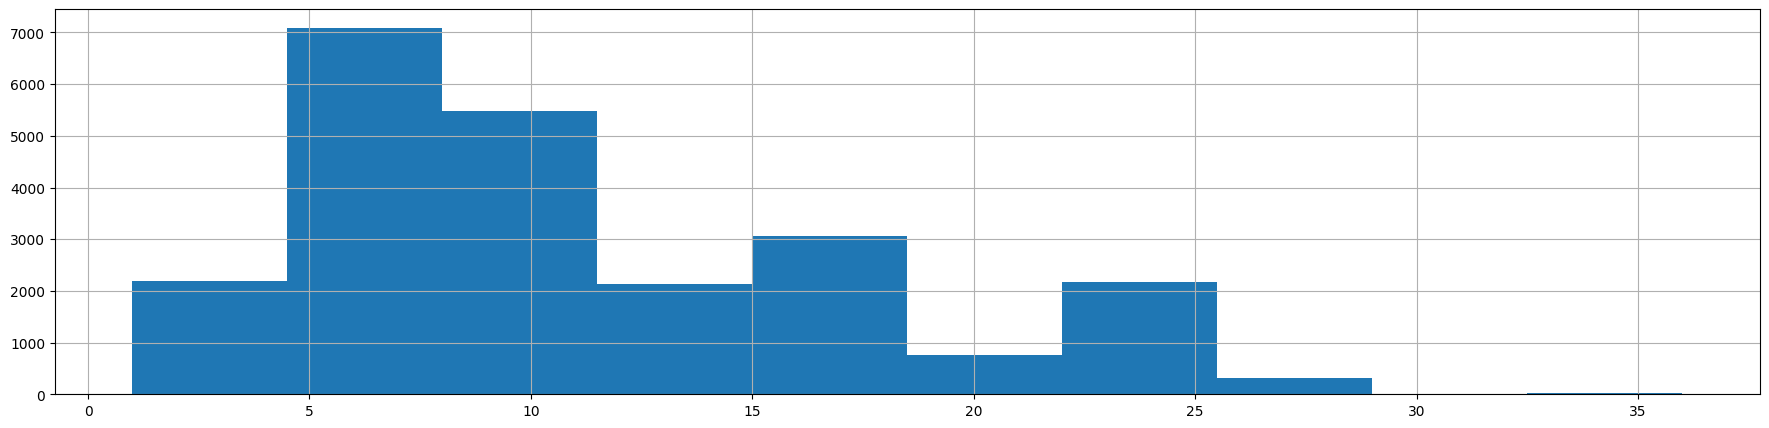

In [87]:
data['floors_total'].hist(figsize = (22, 5))

**В общем, наблюдается тенденция к убыванию количества объявлений с ростом этажности дома. Однако, график имеет дополнительные пики в районе 15 и 25 этажей.**

In [88]:
data['cityCenters_nearest_km'].describe()

count    17821.000000
mean        14.338533
std          8.587193
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: cityCenters_nearest_km, dtype: float64

<Axes: >

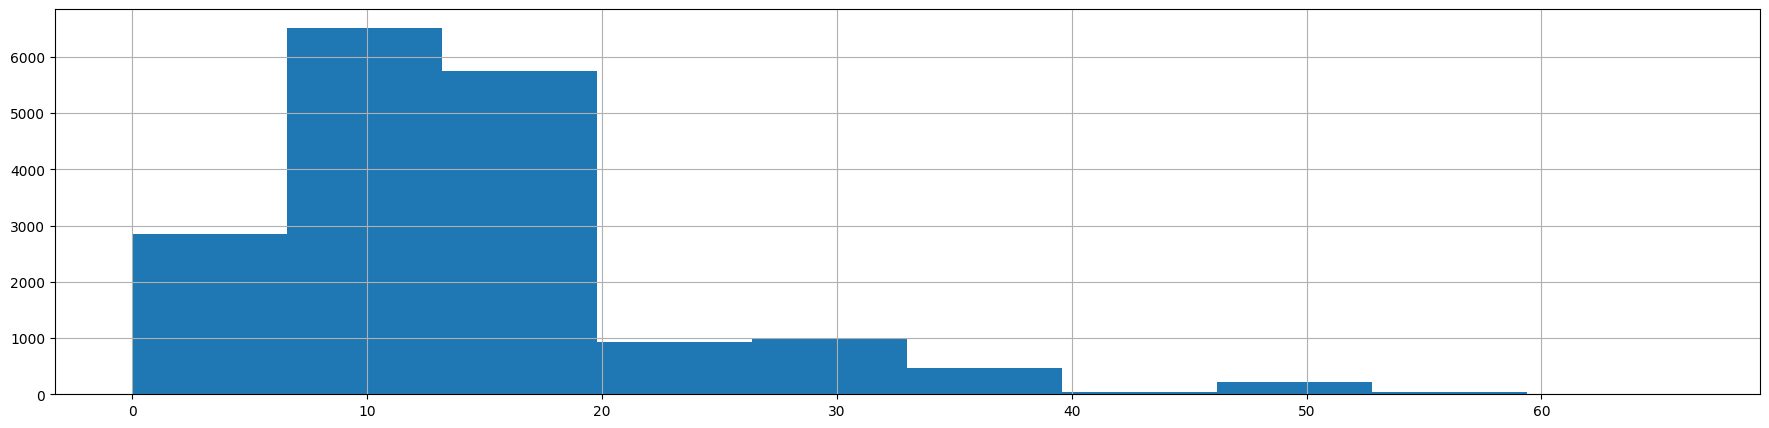

In [89]:
data['cityCenters_nearest_km'].hist(bins = 10, figsize = (22, 5))

**Больше всего объявлений о продаже квартир, расположенных в диапазоне 10-20 км. от центра Санкт-Петербурга**

In [90]:
data['airports_nearest'].describe()

count    17821.000000
mean     28842.867544
std      12700.332874
min          0.000000
25%      18490.000000
50%      26852.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<Axes: >

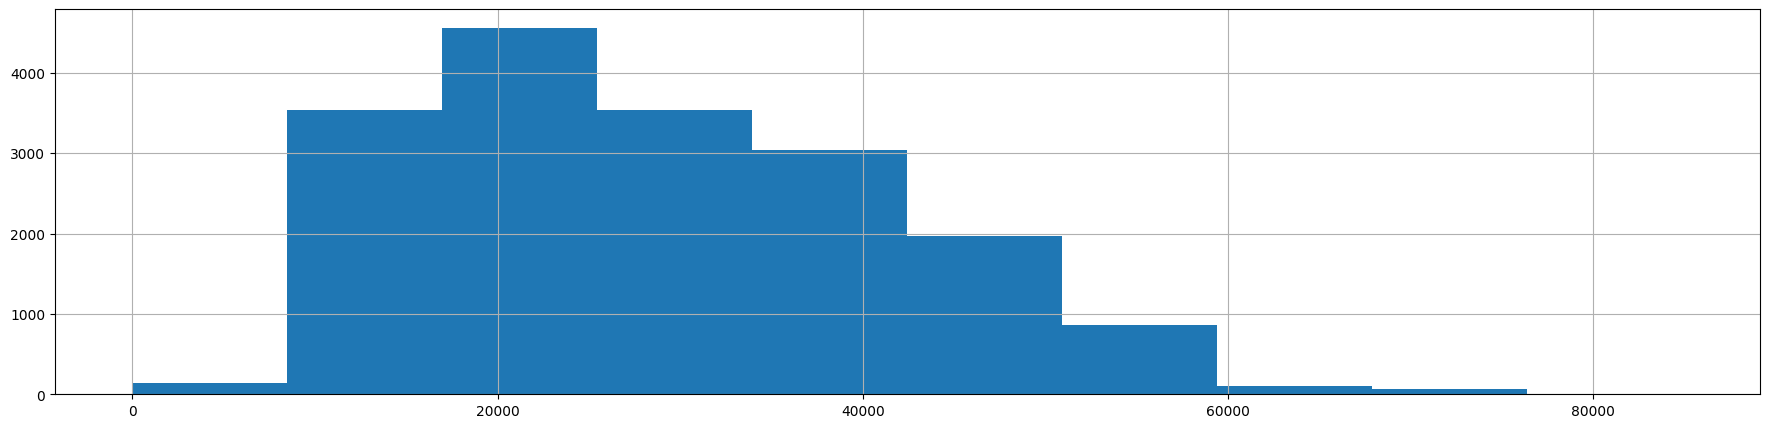

In [91]:
data['airports_nearest'].hist(bins = 10, figsize = (22, 5))

**Больше всего объявлений о продаже квартир, расположенных в диапазоне 20 км. от аэропорта. Крайне мало встречается квартир, расположенных в непосредственной близости от него.**

In [92]:
data['parks_nearest'].describe()

count    7825.000000
mean      493.296358
std       343.910487
min         1.000000
25%       288.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<Axes: >

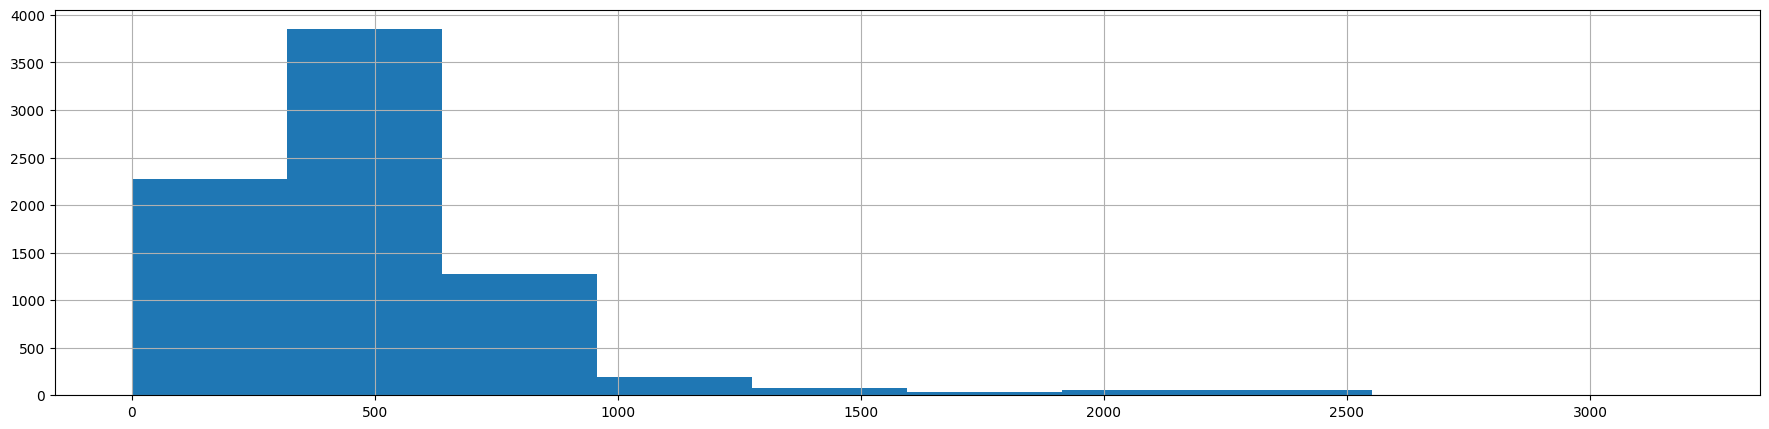

In [93]:
data['parks_nearest'].hist(bins = 10, figsize = (22, 5))

**Большинство квартир расположены довольно близко от ближайших парков. Практически не встречается записей с расстоянием > 1 км.**

In [94]:
data['first_day_exposition'].describe()

<ipython-input-94-13566cf36cff>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['first_day_exposition'].describe()


count                   23330
unique                   1489
top       2018-02-01 00:00:00
freq                      365
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

<Axes: >

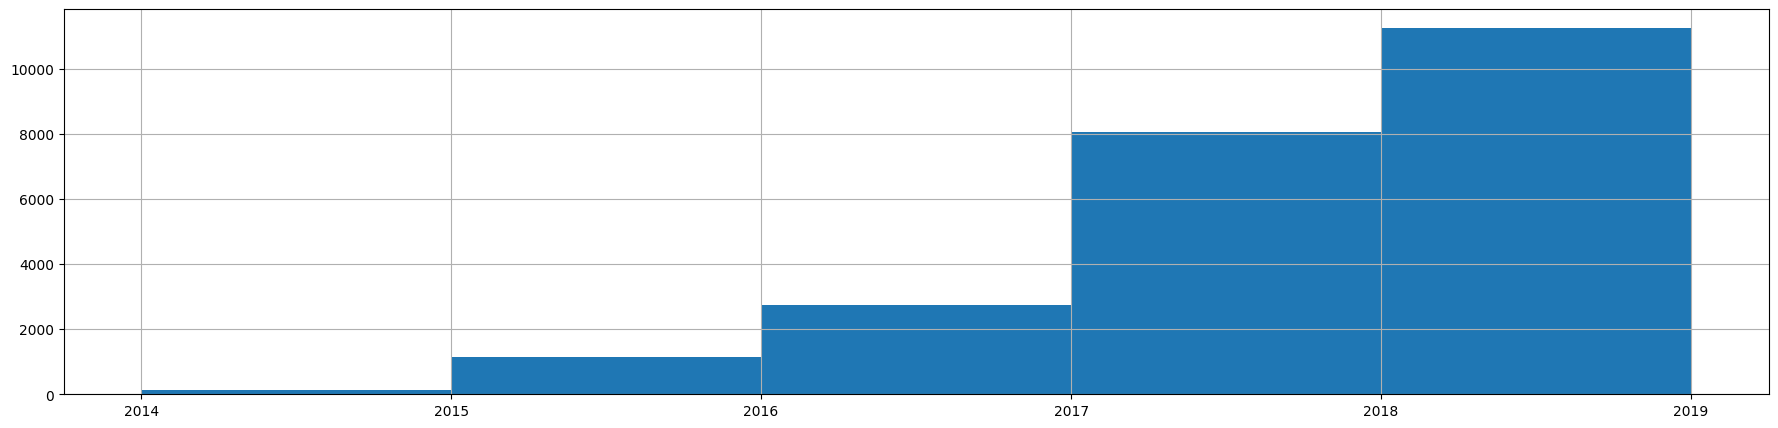

In [95]:
data['year_exposition'].hist(bins = 5, figsize = (22, 5))

**В выборке представлены объявления с 27 ноября 2014 года по 3 мая 2015. Количество публикуемых объявлений ежегодно увеличивается**

In [96]:
data['month_exposition'].value_counts()

2     2600
3     2547
4     2346
11    2340
10    2100
9     1951
6     1733
8     1720
7     1658
12    1611
1     1473
5     1251
Name: month_exposition, dtype: int64

<Axes: >

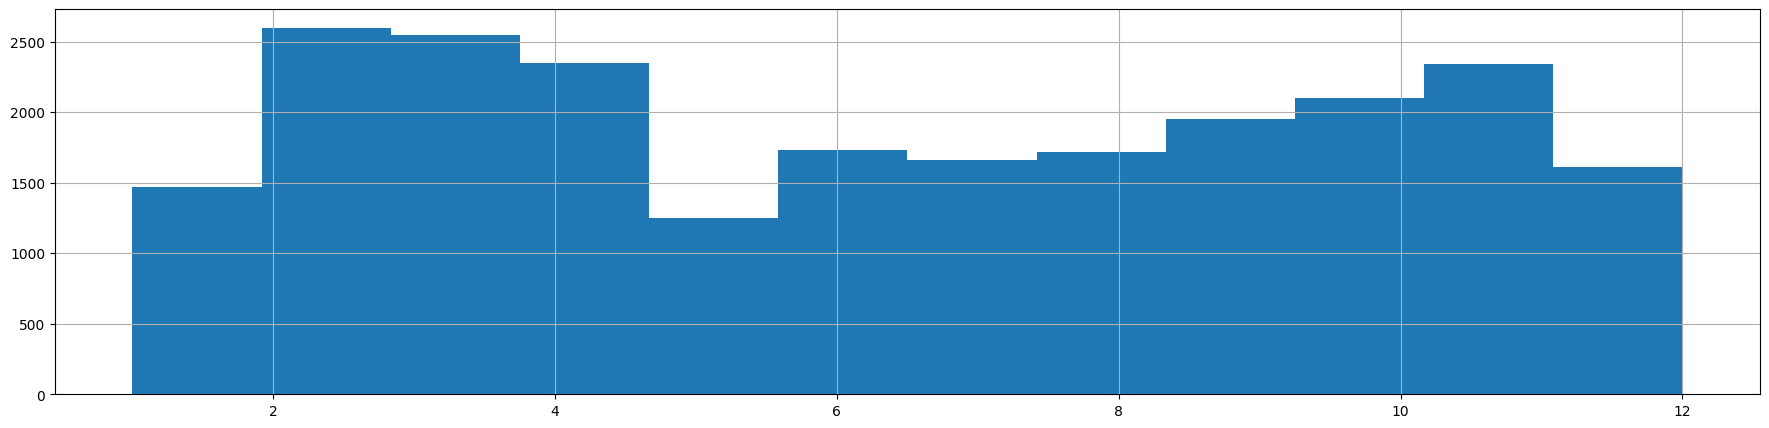

In [97]:
data['month_exposition'].hist(bins = 12, figsize = (22, 5))

**На графике видны сильные спады в размещении объявлений в январе, декабре и мае. Возможно это как-то связано с праздниками**

<Axes: >

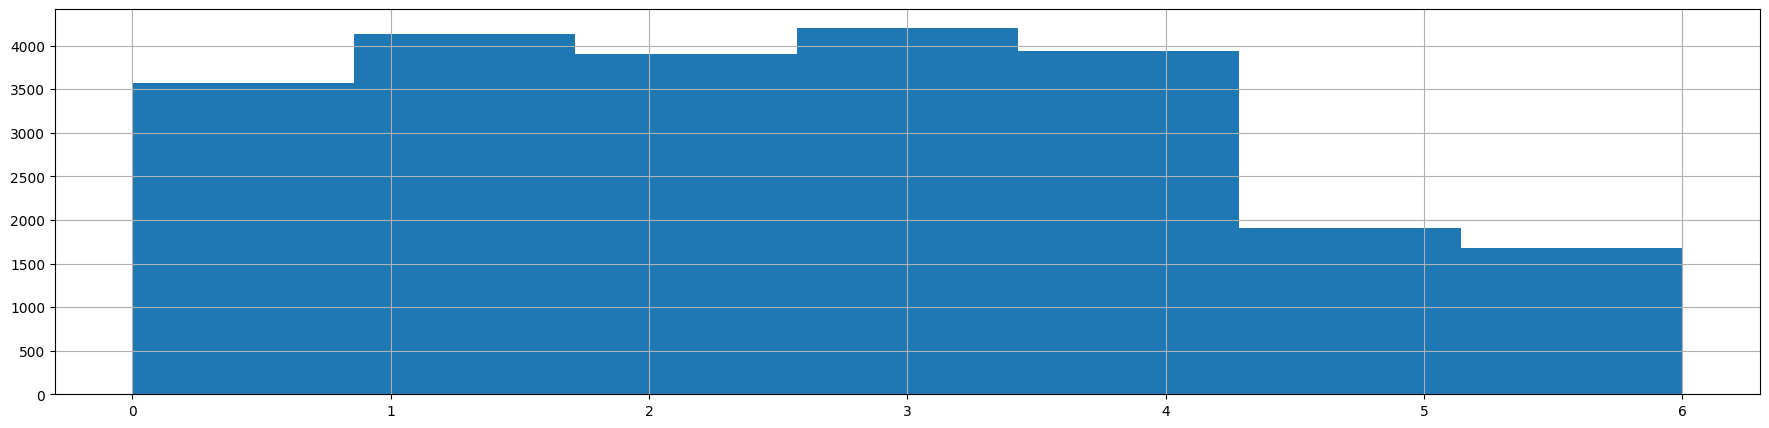

In [98]:
data['weekday_exposition'].hist(bins = 7, figsize = (22, 5))

**В рабочие дни частота размещения объявлений примерно одинакова, а вот на выходных - заметно ниже**

#### Изучение скорости продаж

In [99]:
exp_description = data['days_exposition'].describe()
exp_description

count    20242.000000
mean       179.238168
std        217.969784
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медианное значение - 95 дней, среднее (округлённо) - 181.

<Axes: >

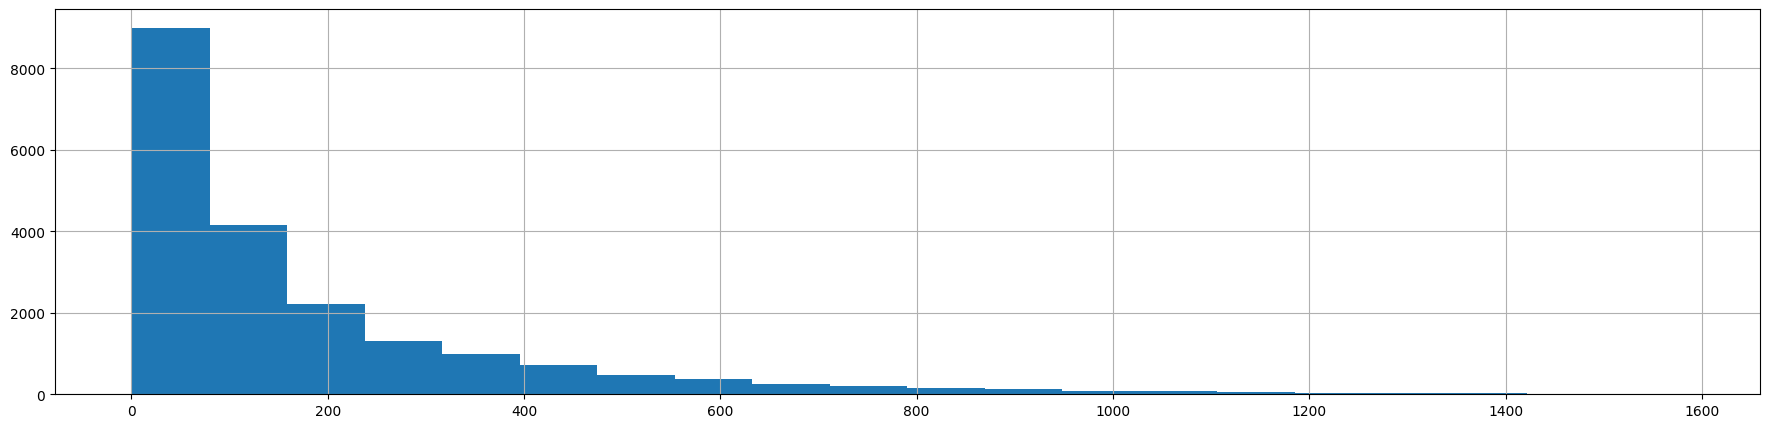

In [100]:
data['days_exposition'].hist(bins = 20, figsize = (22, 5))

Рассмотрим объявления со сроками продажи меньше первого квартиля (25% самых быстрых продаж), чтобы попытаться выделить аномально быстрые продажи

<Axes: >

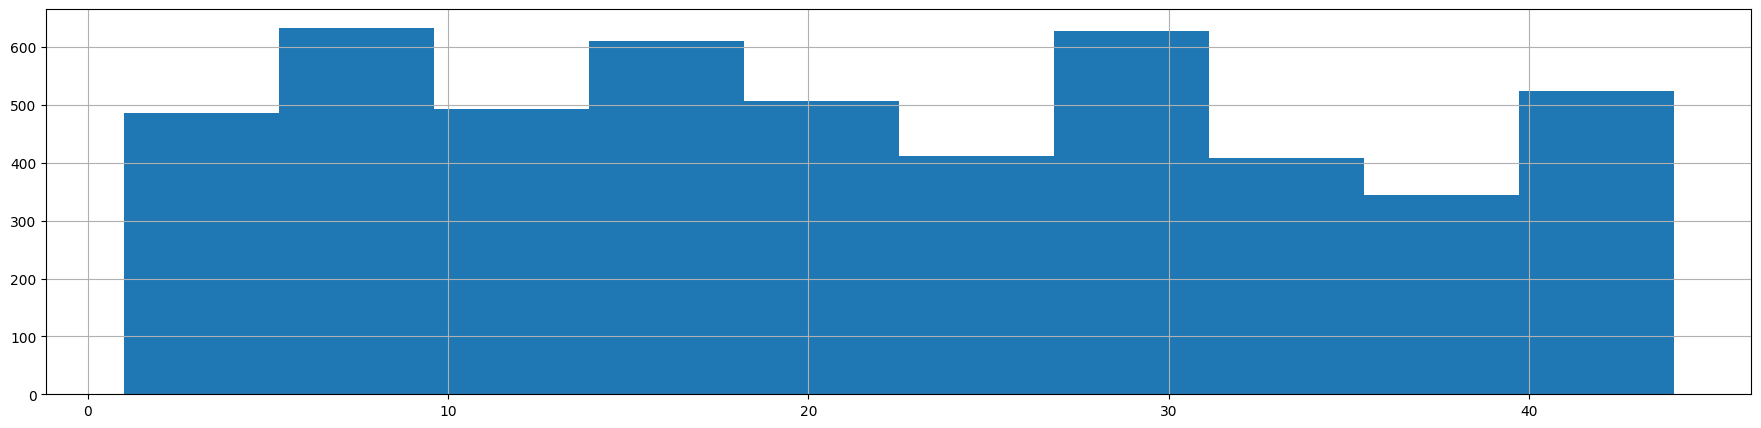

In [101]:
data[data['days_exposition'] < exp_description['25%']]['days_exposition'].hist(bins = 10, figsize = (22, 5))

Значения здесь распределны достаточно равномерно. Невозможно выделить аноомально быстрые продажи.

Рассмотрим 25% самых медленных продаж

<Axes: >

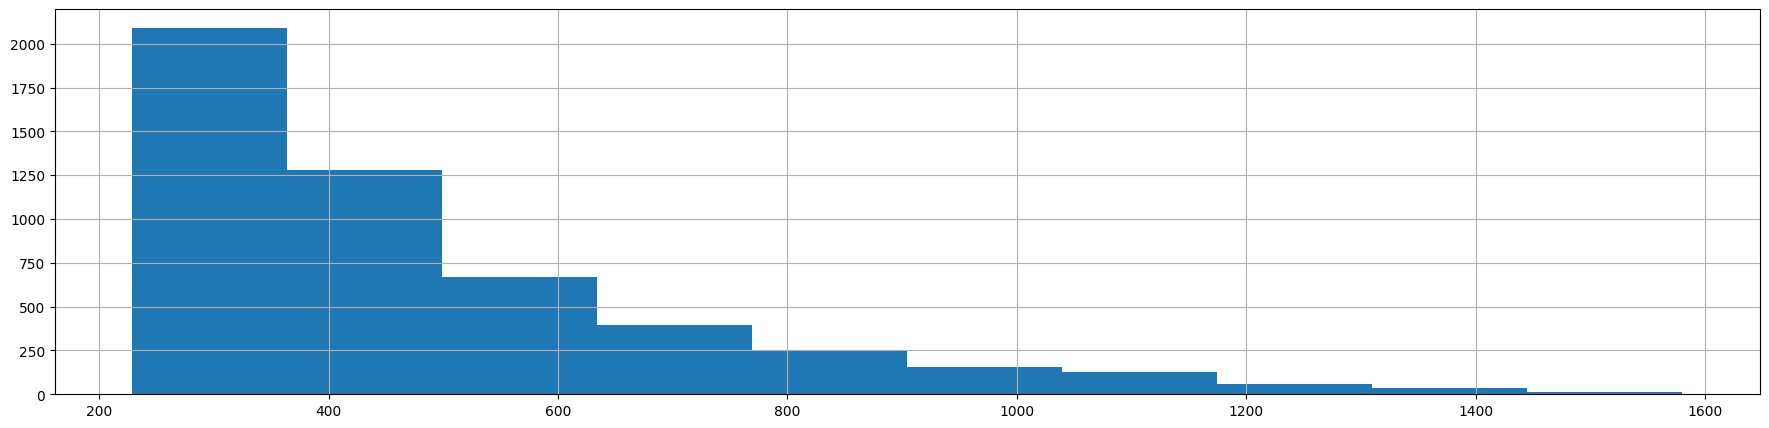

In [102]:
data[data['days_exposition'] >= exp_description['75%']]['days_exposition'].hist(bins = 10, figsize = (22, 5))

Здесь сохраняется тенденция к экспоненциальному убыванию частоты продаж. Построим boxplot, чтобы получить представление о том, что можно будет считать аномально долгими продажами

<Axes: >

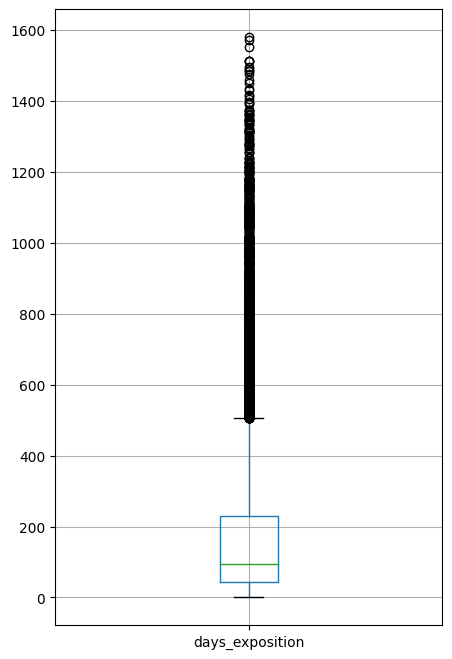

In [103]:
data.boxplot(column = 'days_exposition', figsize = (5, 8))

На boxplot'е в качестве "выбросов" отмечены значения, превышающие 1.5 межквартильного размаха от 3 кваритля. Посмотрим, насколько их много

In [104]:
IQR = exp_description['75%'] - exp_description['25%']
print('Q3 + 1.5 IQR =', exp_description['75%'] + 1.5 * IQR)
print('Доля значений, превышающих Q3 + 1.5 IQR:',
      data[data['days_exposition'] >= exp_description['75%'] + 1.5 * IQR]['days_exposition'].count() /  data['days_exposition'].count())

Q3 + 1.5 IQR = 505.0
Доля значений, превышающих Q3 + 1.5 IQR: 0.08250172907815433


Можно считать аномально быстрыми продажи, которые занимали более 512 дней

Изучим влияние площади на стоимость квартир (поскольку далее нам предстоит аналогичным способом изучать ряд других параметров, создадим функцию для создания сводной таблицы)

In [105]:
data['total_area_bin'] = pd.qcut(data['total_area'], 5)
def group(col):
  return data.groupby(col)['last_price'].agg(['count', 'mean', 'median'])
total_area_group = group('total_area_bin')
total_area_group

,count,mean,median
total_area_bin,,,
"(11.999, 37.3]",4669,3.141047e+06,3180000.0
"(37.3, 45.6]",4675,3.902367e+06,3900000.0
"(45.6, 57.6]",4670,4.647691e+06,4600000.0
"(57.6, 73.5]",4654,6.018882e+06,5750000.0
"(73.5, 200.0]",4662,1.144067e+07,9500000.0


<Axes: xlabel='total_area_bin'>

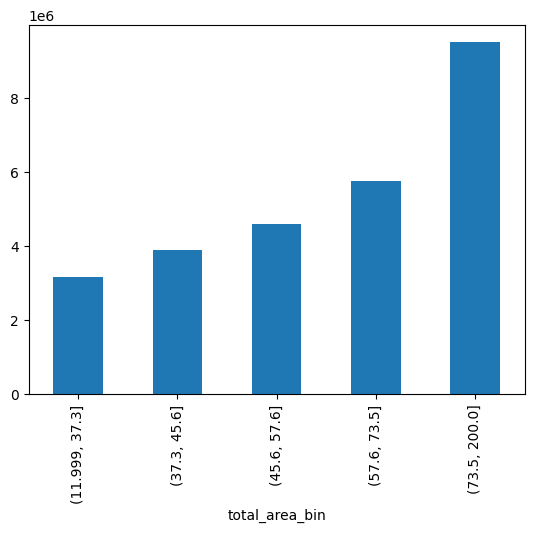

In [106]:
total_area_group['median'].plot(kind = 'bar')

<a id="corr_total_area"></a>

In [107]:
data['last_price'].corr(data['total_area'])

0.761959131273926

Очевидный вывод - чем больше кваритра, тем она дороже, причём зависимость эта нелинейна.

Изучим влияние жилой площади на стоимость

In [108]:
data['living_area_bin'] = pd.qcut(data['living_area'], 5)
living_area_group = group('living_area_bin')
living_area_group

,count,mean,median
living_area_bin,,,
"(1.999, 17.8]",4707,3.604223e+06,3400000.0
"(17.8, 27.5]",4688,4.094907e+06,3900000.0
"(27.5, 32.7]",4625,4.740168e+06,4350000.0
"(32.7, 44.9]",4650,6.288324e+06,5600000.0
"(44.9, 164.7]",4660,1.043694e+07,8552700.0


<Axes: xlabel='living_area_bin'>

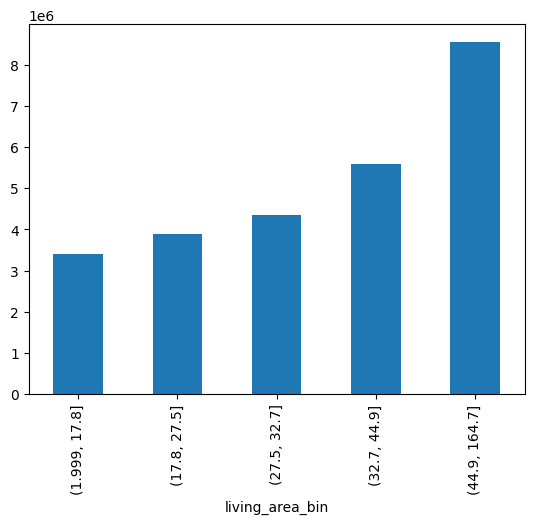

In [109]:
living_area_group['median'].plot(kind = 'bar')

In [110]:
data['last_price'].corr(data['living_area'])

0.6215498272408272

Видим нелинейную зависимость, аналогичную общей площади.

Изучим влияние площади кухни на стоимость

In [111]:
data['kitchen_area_bin'] = pd.qcut(data['kitchen_area'], 5)
kitchen_area_group = group('kitchen_area_bin')
kitchen_area_group

,count,mean,median
kitchen_area_bin,,,
"(-0.001, 7.0]",5676,3.644682e+06,3550000.0
"(7.0, 8.6]",3680,4.551660e+06,4230000.0
"(8.6, 10.0]",5684,5.127779e+06,4400000.0
"(10.0, 12.0]",3693,6.235301e+06,5350000.0
"(12.0, 75.0]",4597,1.008300e+07,8055000.0


<Axes: xlabel='kitchen_area_bin'>

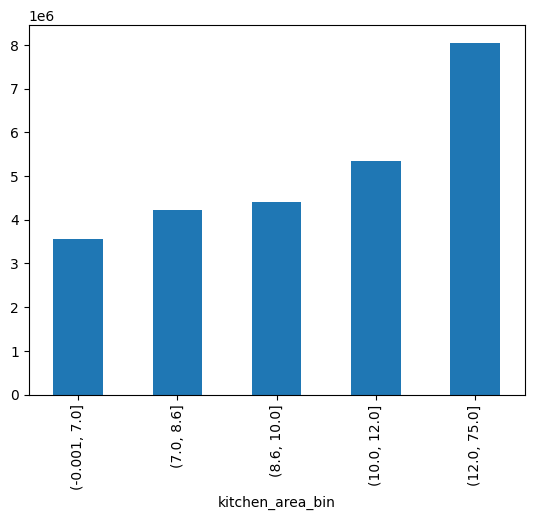

In [112]:
kitchen_area_group['median'].plot(kind = 'bar')

In [113]:
data['last_price'].corr(data['kitchen_area'])

0.5633967832771005

Аналогичная предыдущим двум графикам картина, что неудивительно, ведь жилая площадь и площадь кухни сами по себе зависят от общей площади.

Изучим влияние количества комнат на стоимость

In [114]:
rooms_group = data.groupby('rooms')['last_price'].agg(['count', 'median'])
rooms_group

,count,median
rooms,,
0,196,2700000.0
1,8044,3600000.0
2,7930,4770000.0
3,5773,6180000.0
4,1125,8800000.0
5,262,12500000.0


Отметим, что количество объявлений тем меньше, чем больше число комнат. Не будем рассматривать в анализе категории с менее чем 100 записями, ввиду их нерепрезентативности

<Axes: xlabel='rooms'>

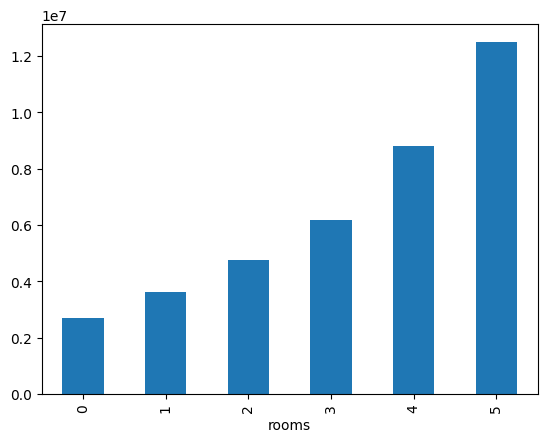

In [115]:
rooms_group.loc[0:6, 'median'].plot(kind = 'bar')

In [116]:
data['last_price'].corr(data['rooms'])

0.45411800712668754

Количетсво комнат также (в общем случае) зависит от площади, поэтому и зависимость стоисости аналогичная.

Рассмотрим распределение стоимости по типам этажей

In [117]:
floor_group = group('floor_type')
floor_group

,count,mean,median
floor_type,,,
другой,17205,6.098310e+06,4800000.0
первый,2888,4.519670e+06,3900000.0
последний,3237,5.556966e+06,4250000.0


<Axes: xlabel='floor_type'>

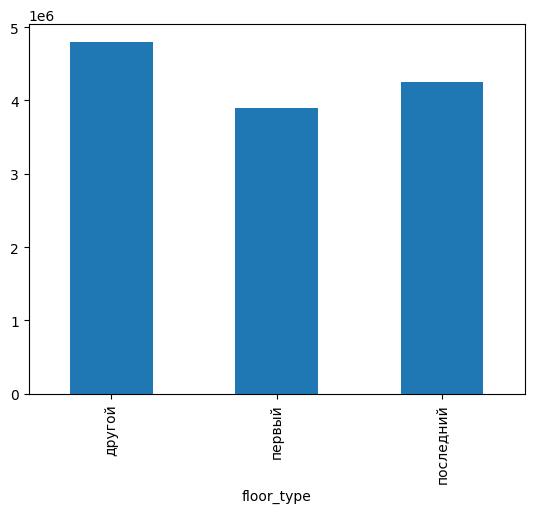

In [118]:
floor_group['median'].plot(kind = 'bar')

Квартиры на первом этаже, в среднем, дешевле всего, а на средних этажах - дороже, однако эта разница не настолько значительна, как в случае с площадью и комнатами (там речь шла о единицах миллионов, здесь - о сотнях тысяч)

Рассмотрим влияние даты размещения объявления на стоимость

<Axes: xlabel='weekday_exposition'>

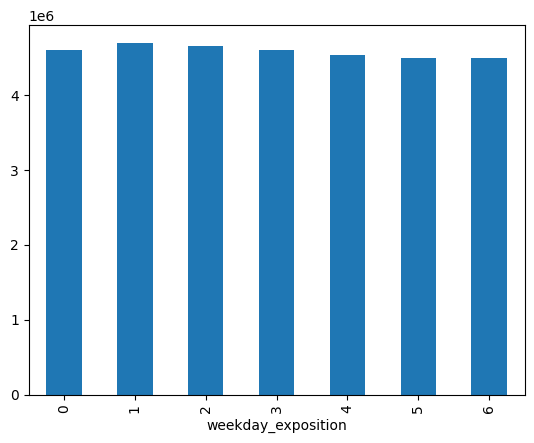

In [119]:
day_group = group('weekday_exposition')
day_group['median'].plot(kind = 'bar')

<Axes: xlabel='month_exposition'>

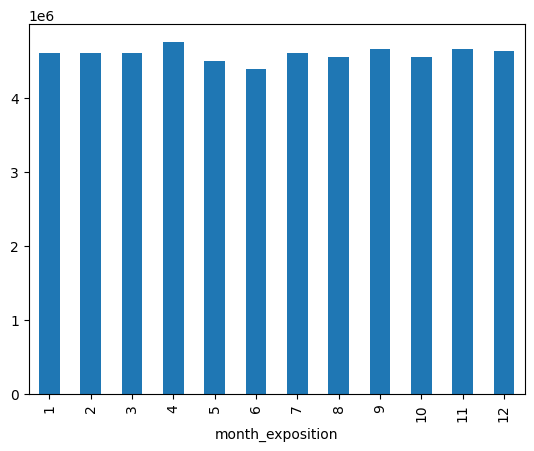

In [120]:
month_group = group('month_exposition')
month_group['median'].plot(kind = 'bar')

<Axes: xlabel='year_exposition'>

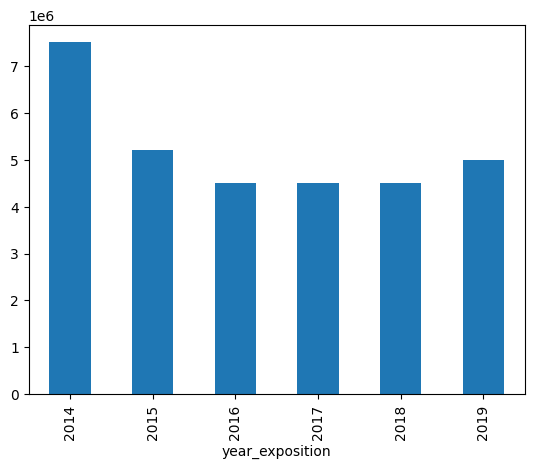

In [121]:
year_group = group('year_exposition')
year_group['median'].plot(kind = 'bar')

День и месяц публицации, ожидаемо, не влияли на стоимость.

Годовая разбивка демонстрирует снижение цен на недвижимость в 2015-2016 годах. В 2019 как будто бы наметилась тенденция к росту.

Расчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [122]:
locality_group = data.groupby('locality_name')['sq_meter_price'].agg(['count', 'mean'])
locality_group_top = locality_group.sort_values(by = 'count', ascending = False).iloc[:10]
locality_group_top

,count,mean
locality_name,,
санкт-петербург,15372,112294.221836
мурино,590,86087.512050
кудрово,472,95324.930544
шушары,440,78677.364217
всеволожск,398,68654.473986
пушкин,363,103213.468857
колпино,337,75333.295801
парголово,326,90332.263023
гатчина,307,68746.146763


In [123]:
locality_group_top.sort_values(by = 'mean', ascending = False).head(3)

,count,mean
locality_name,,
санкт-петербург,15372,112294.221836
пушкин,363,103213.468857
кудрово,472,95324.930544


In [124]:
locality_group_top.sort_values(by = 'mean', ascending = False).tail(3)

,count,mean
locality_name,,
гатчина,307,68746.146763
всеволожск,398,68654.473986
выборг,237,58141.909153


Тройка лидеров по стоимости кв. метра - Санкт-Петербург, Пушкин и Кудрово. Самое дешёвое жильё в Гатчике, Всеволжске и Выборге.

Теперь выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра. Определим, как стоимость объектов зависит от расстояния до центра города.

In [125]:
spb = data[data['locality_name'] == 'санкт-петербург'].reset_index(drop = True)
spb_group = spb.groupby('cityCenters_nearest_km')['last_price'].agg(['count', 'mean'])
spb_group

,count,mean
cityCenters_nearest_km,,
0.0,22,2.012189e+07
1.0,166,1.201692e+07
2.0,270,1.169397e+07
3.0,327,9.836493e+06
4.0,646,1.052394e+07
5.0,849,1.120878e+07
6.0,562,1.109937e+07
7.0,391,1.126298e+07
8.0,590,8.941963e+06


<Axes: xlabel='cityCenters_nearest_km'>

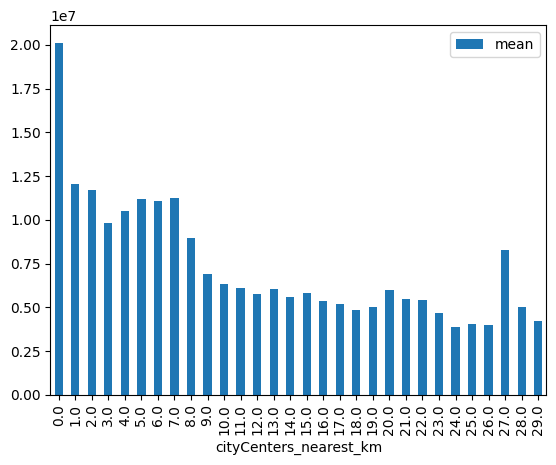

In [126]:
spb_group.reset_index().plot(x = 'cityCenters_nearest_km', y = 'mean', kind = 'bar')

В целом, наблюдается тенденция к снижению стоимости жилья при удалении от центра города

**Вывод: на стоимость квартир влияет их размер (общая, жилая площади и площадь кухни, а также количество комнат), тип этажа (квартиры на средних этажах дороже), а также расстояние до центра города**

### Общий вывод

Изучены данные о продажах квартир за период с 27 ноября 2014 года по 3 мая 2015 года
- В данных о расположении объектов обнаружено значительное количество пропусков, вызванных, вероятнее всего, ошибками в выгрузке.
- Также отмечены пропуски в количестве балконов, комнат, этажей и названиях населённых пунктов.
- Устранены дубликаты в названиях населённых пунктов (убрано около 60 повторяющихся названий)
- Произведена очистка данных от выбросов. В анализе не учитывались данные о квартирах:
    - стоимостью менее 400 тыс. и более 50 млн. рублей
    - с 6 и более комнатами
    - площадью более 200 м²
    - выше 36 этажа
- Всего удалено около 1.5% первоначальных данных
- Расчитаны следующие показатели:
    - цена квадратного метра
    - день недели, месяц и год публикации объявления
    - тип этажа квартиры
    - расстояние в километрах до центра города
- Изучены данные об общей, жилой площади и площади кухонь. Эти показатели имеют сходное распределение, быстро нарастающее (с максимумами в районе 50, 20 и 10 м² соответственно) в начале, а затем экспоненциально убывающее.
- Изучена стоимость объектов. ПОдавляющее большинство квартир имеет стоимость менее 5 миллионов рублей.
- Изучены данные о количестве комнат. Наиболее часто встречаются одно- и двухкомнатные квартира
- Изучены данные о расположении квартир по этажам. Большая часть квартир расположены ниже пятого этажа. Если говорить о типе этажей, то на большая часть квартир располагается на средних этажах.
- Изучено распределение этажности домов. Наибольшее количество записей с данными о пятиэтажных домах, после чего график начинает стремительно убывать, однако имеет промежуточные максимумы на 15 и 25 этажных домах
- Изучены данные о близости к аэропортам. Чаще всего встречаются квартиры, расположенные в 20-25 километрах от аэропортов. Практически не встречается упоминание о квартирах, расположенных в непосредственной близости.
- Практически все квартиры расположены довольно близко (ближе 1 км.) к паркам.
- Отмечена тенденция к ежегодному росту количества размещаемых объявлений.
- Меньше всего объявлений размещается в январе, мае и декабре.
- Активнее всего пользователи размещают объявления в будние дни (примерно в 2 раза чаще, чем в выходные)
- Изучена скорость продажи квартир. Медианное значение - 95 дней, среднее - 181.
- Обнаружены прямые зависимости между стоимостью объекта и площадью (общей, жилой и площадью кухни), а также количеством комнат. Значительнее всего на стоимость влияет общая площадь объекта.
- Обнаружена зависимость стоимости от типа этажа. Квартиры на средних этажах дороже первых и последних. Влияние этого фактора на стоимость значительно меньше, чем площади.
- Зависимости стоимости от месяца и дня размещения не выявлено
- Выявлено падение медианной стоимости объектов с 2014 по 2016 годы (с 7.7 до 4.5 млн. руб.)
- Выделены топ-10 населённых пунктов по количеству опубликованных объявлений. Среди них определены населенные пункты с минимальной (Гатчина, Всеволжск, Выборг) и максимальной Санкт-Петербург, Пушкин и Кудрово) стоимостью квадратного метра.
- Обнаружена обратная зависимость стоимости объектов от расстояния до центра городна, однако, начиная с 10 километров стоимость изменяется незначительно.